## Student Information

Name:林貫原

Student ID:711233119

GitHub ID:https://github.com/GPLIN514/DM2024-Lab1-Master.git

---

## Section 2

---

In [1]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline


In [3]:
# obtain the documents containing the categories provided
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df['category'] = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})

In [4]:
df[0:2]

sentiment                                            comment  category
0  not nostalgia  He was a singer with a golden voice that I lov...         0
1      nostalgia  The mist beautiful voice ever I listened to hi...         1

In [6]:
df.columns

Index(['sentiment', 'comment', 'category'], dtype='object')

In [7]:
len(df)

1500

In [8]:
df['comment']

0       He was a singer with a golden voice that I lov...
1       The mist beautiful voice ever I listened to hi...
2       I have most of Mr. Reeves songs.  Always love ...
3       30 day leave from 1st tour in Viet Nam to conv...
4       listening to his songs reminds me of my mum wh...
                              ...                        
1495    i don't know!..but the opening of the video,.....
1496    it's sad this is such a beautiful song when yo...
1497    Dear Friend, I think age and time is not that ...
1498    I was born in 1954 and started to be aware of ...
1499    This is the first CD I bought after my marriag...
Name: comment, Length: 1500, dtype: object

In [9]:
df['comment'][0:10]

0    He was a singer with a golden voice that I lov...
1    The mist beautiful voice ever I listened to hi...
2    I have most of Mr. Reeves songs.  Always love ...
3    30 day leave from 1st tour in Viet Nam to conv...
4    listening to his songs reminds me of my mum wh...
5    Every time I heard this song as a child, I use...
6    My dad loved listening to Jim Reeves, when I w...
7    i HAVE ALSO LISTENED TO Jim Reeves since child...
8             Wherever you  are you always in my heart
9    Elvis will always be number one no one can com...
Name: comment, dtype: object

---

### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [10]:
# Answer here
for i in df.comment[:3]:
    print(i)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


---

## 3. Data Transformation

---

### 3.1 Converting Dictionary into Pandas Dataframe

In [11]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = df
X

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  
0            0  
1            1  
2            1  
3            0  
4            1  
...        ...  
1495         0  
1496         0  
1497         0  
1498         1  
1499         1  

[1500 rows x 3 columns]

In [12]:
len(X)

1500

In [13]:
X[0:2]

sentiment                                            comment  category
0  not nostalgia  He was a singer with a golden voice that I lov...         0
1      nostalgia  The mist beautiful voice ever I listened to hi...         1

In [14]:
for t in X["comment"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [15]:
# add category to the dataframe
X['category'] = X['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})

In [16]:
# add category label also
X['category_name'] = X['category'].map({1: 'nostalgia', 0: 'not nostalgia'})

In [17]:
X[0:10]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   
9  not nostalgia  Elvis will always be number one no one can com...         0   

   category_name  
0  not nostalgia  
1      nostalgia  
2      nostalgia  
3  not nostalgia  
4      nostalgia  
5      nostalgia  
6      nostalgia  
7      nostalgia  
8  not nostalgia  
9  not nostalgia

---

### 3.2 Familiarizing yourself with the Data

To begin to show you the awesomeness of Pandas dataframes, let us look at how to run a simple query on our dataset. We want to query for the first 10 rows (documents), and we only want to keep the `text` and `category_name` attributes or fields.

In [18]:
# a simple query
X[:10][["comment","category_name"]]

comment  category_name
0  He was a singer with a golden voice that I lov...  not nostalgia
1  The mist beautiful voice ever I listened to hi...      nostalgia
2  I have most of Mr. Reeves songs.  Always love ...      nostalgia
3  30 day leave from 1st tour in Viet Nam to conv...  not nostalgia
4  listening to his songs reminds me of my mum wh...      nostalgia
5  Every time I heard this song as a child, I use...      nostalgia
6  My dad loved listening to Jim Reeves, when I w...      nostalgia
7  i HAVE ALSO LISTENED TO Jim Reeves since child...      nostalgia
8           Wherever you  are you always in my heart  not nostalgia
9  Elvis will always be number one no one can com...  not nostalgia

#### Let's query the last 10 records

In [19]:
X[-10:]

sentiment                                            comment  \
1490  not nostalgia  He really isn't my cup of tea, but some of his...   
1491      nostalgia  real music...how i miss those days...brings ba...   
1492      nostalgia  i used to cry over this song cause i had a boy...   
1493  not nostalgia  He really has that "love you like a brother" l...   
1494  not nostalgia  That's funny. But Leo really is a nice guy. He...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  category_name  
1490         0  not nostalgia  
1491         1      nostalgia  
1492         1      nostalgia  
1493         0  not nostalgia  
1494         0  not nostalgia  
1495         0  not nostalgia  
1496         0  not nostalgia  
1497         0  not nostalgia  
1498         1      nostalgia  
1499         1      nostalgia

In [20]:
X.head(10)

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   
9  not nostalgia  Elvis will always be number one no one can com...         0   

   category_name  
0  not nostalgia  
1      nostalgia  
2      nostalgia  
3  not nostalgia  
4      nostalgia  
5      nostalgia  
6      nostalgia  
7      nostalgia  
8  not nostalgia  
9  not nostalgia

Ready for some sourcery? Brace yourselves! Let us see if we can query the first 10th record in our dataframe. For this we will use the build-in function called `loc`. This allows us to explicity define the columns you want to query.

In [21]:
# using loc (by label)
X.loc[:10, 'comment'] # X.loc[:10, 'category']

0     He was a singer with a golden voice that I lov...
1     The mist beautiful voice ever I listened to hi...
2     I have most of Mr. Reeves songs.  Always love ...
3     30 day leave from 1st tour in Viet Nam to conv...
4     listening to his songs reminds me of my mum wh...
5     Every time I heard this song as a child, I use...
6     My dad loved listening to Jim Reeves, when I w...
7     i HAVE ALSO LISTENED TO Jim Reeves since child...
8              Wherever you  are you always in my heart
9     Elvis will always be number one no one can com...
10    ill bet if they begin to play this song on the...
Name: comment, dtype: object

You can also use the `iloc` function to query a selection of our dataset by position. Take a look at this [great discussion](https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-ix-vs-at-vs-iat/43968774) on the differences between the `iloc` and `loc` functions.

In [22]:
# using iloc (by position)
X.iloc[:10, 0]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: sentiment, dtype: object

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [23]:
#Answer here
X.iloc[4:6, 1:3]

comment  category
4  listening to his songs reminds me of my mum wh...         1
5  Every time I heard this song as a child, I use...         1

`.query()`: SQL-like syntax for filtering data. It makes complex filtering easier to read.

In [24]:
#Answer here
X.query('category == 1') #select * from X where category == 1

sentiment                                            comment  category  \
1     nostalgia  The mist beautiful voice ever I listened to hi...         1   
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
4     nostalgia  listening to his songs reminds me of my mum wh...         1   
5     nostalgia  Every time I heard this song as a child, I use...         1   
6     nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
...         ...                                                ...       ...   
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...         1   
1491  nostalgia  real music...how i miss those days...brings ba...         1   
1492  nostalgia  i used to cry over this song cause i had a boy...         1   
1498  nostalgia  I was born in 1954 and started to be aware of ...         1   
1499  nostalgia  This is the first CD I bought after my marriag...         1   

     category_name  
1        nostalgia  
2        nostalgia  
4        nostalgia  
5        nostalgia  
6        nostalgia  
...            ...  
1488     nostalgia  
1491     nostalgia  
1492     nostalgia  
1498     nostalgia  
1499     nostalgia  

[750 rows x 4 columns]

`.mask()`: Opposite of `.where()`; it replaces values where a condition is True

In [25]:
#Answer here
X.where(X['category'] > 2, 0)  # Replace values in "column1" <= 50 with 0

sentiment comment  category category_name
0            0       0         0             0
1            0       0         0             0
2            0       0         0             0
3            0       0         0             0
4            0       0         0             0
...        ...     ...       ...           ...
1495         0       0         0             0
1496         0       0         0             0
1497         0       0         0             0
1498         0       0         0             0
1499         0       0         0             0

[1500 rows x 4 columns]

In [26]:
#Answer here
X.mask(X['category'] > 2, 0) # Replace values > 50 with 0

sentiment                                            comment  \
0     not nostalgia  He was a singer with a golden voice that I lov...   
1         nostalgia  The mist beautiful voice ever I listened to hi...   
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4         nostalgia  listening to his songs reminds me of my mum wh...   
...             ...                                                ...   
1495  not nostalgia  i don't know!..but the opening of the video,.....   
1496  not nostalgia  it's sad this is such a beautiful song when yo...   
1497  not nostalgia  Dear Friend, I think age and time is not that ...   
1498      nostalgia  I was born in 1954 and started to be aware of ...   
1499      nostalgia  This is the first CD I bought after my marriag...   

      category  category_name  
0            0  not nostalgia  
1            1      nostalgia  
2            1      nostalgia  
3            0  not nostalgia  
4            1      nostalgia  
...        ...            ...  
1495         0  not nostalgia  
1496         0  not nostalgia  
1497         0  not nostalgia  
1498         1      nostalgia  
1499         1      nostalgia  

[1500 rows x 4 columns]

`.isin`: Check if values in a column are part of a given list of values.

In [27]:
#Answer here
X[X['category'].isin([1, 3])] # select * from X where category in (1, 3)

sentiment                                            comment  category  \
1     nostalgia  The mist beautiful voice ever I listened to hi...         1   
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
4     nostalgia  listening to his songs reminds me of my mum wh...         1   
5     nostalgia  Every time I heard this song as a child, I use...         1   
6     nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
...         ...                                                ...       ...   
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...         1   
1491  nostalgia  real music...how i miss those days...brings ba...         1   
1492  nostalgia  i used to cry over this song cause i had a boy...         1   
1498  nostalgia  I was born in 1954 and started to be aware of ...         1   
1499  nostalgia  This is the first CD I bought after my marriag...         1   

     category_name  
1        nostalgia  
2        nostalgia  
4        nostalgia  
5        nostalgia  
6        nostalgia  
...            ...  
1488     nostalgia  
1491     nostalgia  
1492     nostalgia  
1498     nostalgia  
1499     nostalgia  

[750 rows x 4 columns]

`.reindex()` : You can freely choose the order in which the indexes are displayed.

In [28]:
#Answer here
X.reindex([5,3,1]) # #It was reindexed to 3, 2 , 1.

sentiment                                            comment  category  \
5      nostalgia  Every time I heard this song as a child, I use...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   

   category_name  
5      nostalgia  
3  not nostalgia  
1      nostalgia

`.sample(frac=)` : It is used to randomly select a fraction of rows from a DataFrame. The rows are selected randomly. If you want to sample with replacement, you can set the `replace=True` argument.

In [29]:
#Answer here
X.sample(frac=0.005) # Randomly select a fraction of rows

sentiment                                            comment  \
525       nostalgia  What a warm voice. I feel so nostalgic and ful...   
788       nostalgia  Thanks for today all those old songs are my be...   
862   not nostalgia  i don't want to be leader of your gang thank y...   
25    not nostalgia  The Lord was really showing off when he made E...   
263   not nostalgia  True country music today country music sucks I...   
1486  not nostalgia  I like cutting out pictures like he is doing a...   
484   not nostalgia  Nice intro, the tune would be better without a...   
1482      nostalgia  Love the song, brings me back to a better plac...   

      category  category_name  
525          1      nostalgia  
788          1      nostalgia  
862          0  not nostalgia  
25           0  not nostalgia  
263          0  not nostalgia  
1486         0  not nostalgia  
484          0  not nostalgia  
1482         1      nostalgia

---

### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [30]:
# Answer here
X.query("category_name == 'nostalgia'").iloc[::10].head(5)

sentiment                                            comment  category  \
1   nostalgia  The mist beautiful voice ever I listened to hi...         1   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...         1   
32  nostalgia  I remember my Mom listening to Jim over and ov...         1   
50  nostalgia  If I remember correctly, this song came out af...         1   
71  nostalgia  Gosh does this bring back memories. Nearly eve...         1   

   category_name  
1      nostalgia  
18     nostalgia  
32     nostalgia  
50     nostalgia  
71     nostalgia

In [31]:
# Answer here
X.loc[X['category_name'] == 'nostalgia'].iloc[::10].head(5)

sentiment                                            comment  category  \
1   nostalgia  The mist beautiful voice ever I listened to hi...         1   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...         1   
32  nostalgia  I remember my Mom listening to Jim over and ov...         1   
50  nostalgia  If I remember correctly, this song came out af...         1   
71  nostalgia  Gosh does this bring back memories. Nearly eve...         1   

   category_name  
1      nostalgia  
18     nostalgia  
32     nostalgia  
50     nostalgia  
71     nostalgia

In [32]:
X[X['category_name']=='nostalgia'].iloc[::10][0:5]

sentiment                                            comment  category  \
1   nostalgia  The mist beautiful voice ever I listened to hi...         1   
18  nostalgia  My Grandparents had a pub in the 1970's, this ...         1   
32  nostalgia  I remember my Mom listening to Jim over and ov...         1   
50  nostalgia  If I remember correctly, this song came out af...         1   
71  nostalgia  Gosh does this bring back memories. Nearly eve...         1   

   category_name  
1      nostalgia  
18     nostalgia  
32     nostalgia  
50     nostalgia  
71     nostalgia

---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [33]:
# check missing values
X.isnull()

sentiment  comment  category  category_name
0         False    False     False          False
1         False    False     False          False
2         False    False     False          False
3         False    False     False          False
4         False    False     False          False
...         ...      ...       ...            ...
1495      False    False     False          False
1496      False    False     False          False
1497      False    False     False          False
1498      False    False     False          False
1499      False    False     False          False

[1500 rows x 4 columns]

In [34]:
X.isnull().sum()

sentiment        0
comment          0
category         0
category_name    0
dtype: int64

In [35]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

---

### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [36]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---

In [37]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "category"])

In [38]:
dummy_series

comment     dummy_record
category               1
dtype: object

In [39]:
dummy_series.to_frame().T
# .to_frame() -> Convert Series to DataFrame
# .T          -> Transpose

comment category
0  dummy_record        1

In [40]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [41]:
# check if the records was commited into result
len(result_with_series)

1501

In [42]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1

In [43]:
# dummy record as dictionary format
dummy_dict = [{'comment': 'dummy_record',
               'category': 1
              }]

In [44]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [45]:
len(X)

1501

In [46]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1

In [47]:
X.dropna(inplace=True)

In [48]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [49]:
len(X)

1500

---

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [50]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [51]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [56]:
# Answer here

We're creating a DataFrame with various representations of "missing" values and using the `.isnull()` method to detect them.

1. `np.nan`: A standard representation of missing values in `pandas` and `NumPy`. Detected as `True`.
2. `Missing Key`: In `B`, the `missing_example` key is absent, which results in a `NaN` (`pandas` fills in the missing key with `NaN`). Detected as `True`.
3. 'NaN' (String)`: In `C`, `missing_example` has a string value of `'NaN'`. However, `pandas` treats this as a normal string, not a missing value. Detected as `False`.
4. `'None' (String)`: In `D`, the value `None` is a string, so `pandas` also treats it as a normal string, not a missing value. Detected as `False`.
5. `None` (Python's `None`): In `E`, the value is Python's `None`, which is recognized by `pandas` as a missing value. Detected as `True`.
6. Empty String (`''`): In `F`, the value is an empty string. `pandas` does not treat empty strings as missing values by default, so it is detected as `False`.

- `np.nan` and `None` (Python's `None`) are automatically recognized as missing.
- String representations like `'NaN'`, `'None'`, and empty strings are not automatically treated as missing and require additional handling.

---

### 4.2 Dealing with Duplicate Data

In [51]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [53]:
sum(X.duplicated())

1

In [54]:
sum(X.duplicated('comment'))

1

In [62]:
dummy_duplicate_dict = [{
                             'comment': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'comment': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [63]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)

In [64]:
len(X)

1502

In [65]:
sum(X.duplicated())

3

In [66]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [52]:
len(X)

1500

Check out the Pandas [documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html?highlight=duplicate#duplicate-data) for more information on dealing with duplicate data.

---

## 5.  Data Preprocessing

---

### 5.1 Sampling

In [52]:
X_sample = X.sample(n=1000) #random state

In [53]:
len(X_sample)

1000

In [54]:
X_sample[0:4]

sentiment                                            comment  \
1060      nostalgia  That was certainly the time I was in elementar...   
1329  not nostalgia  very easy to do... you didn't even need to be ...   
219   not nostalgia  What really made Adam Faith's records so good ...   
428       nostalgia  Engelbert Humperdinck's album is my childhood ...   

      category  category_name  
1060         1      nostalgia  
1329         0  not nostalgia  
219          0  not nostalgia  
428          1      nostalgia

---

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [237]:
# Answer here

Randomly select 1000 rows from the original DataFrame `X`. Here are some observations about the output:

1. Random Selection: The 1000 rows in `X_sample` were chosen randomly from the original DataFrame, so the records present in `X_sample` are not necessarily the first 1000 rows of the original DataFrame `X`.

2. Row Order: The order of rows in `X_sample` is different from the original DataFrame. Since rows are sampled randomly, the sequence in which they appear in `X_sample` will likely not match their order in `X`.

3. No Guarantee of Uniqueness: By default, the sampling is done without replacement, meaning each row in `X_sample` is unique. However, if you sample with `replace=True`, duplicate rows can appear in the output.

To summarize:
- The records in `X_sample` differ from the original DataFrame because they were selected randomly.
- The order of rows in `X_sample` has been shuffled, and the indices are not sequential.
- The values in `X_sample` might vary depending on the random selection process, making the first few rows of `X_sample` different from those in `X`.

---

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

not nostalgia    750
nostalgia        750
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

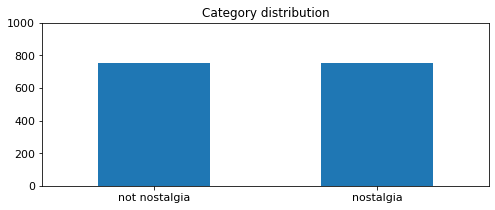

In [56]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

not nostalgia    510
nostalgia        490
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

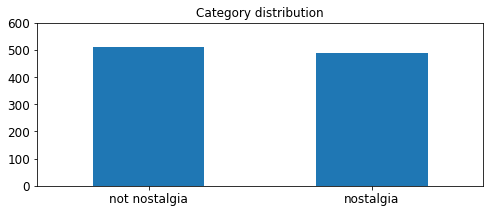

In [57]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

You can use following command to see other available styles to prettify your charts.
```python
print(plt.style.available)

In [58]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


not nostalgia    510
nostalgia        490
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

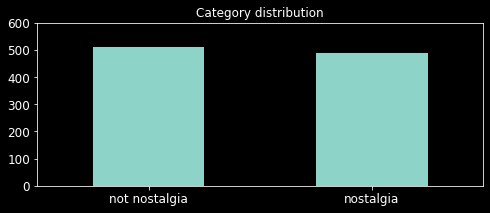

In [59]:
print(X_sample.category_name.value_counts())
plt.style.use('dark_background')
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

not nostalgia    510
nostalgia        490
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

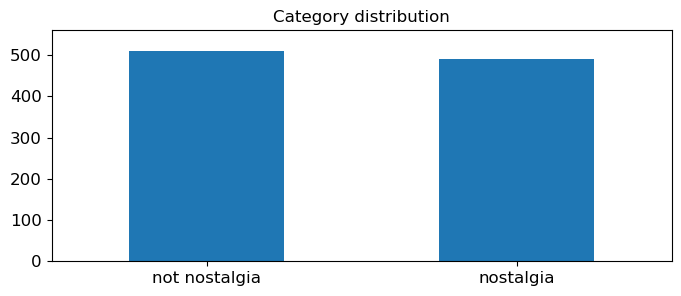

In [60]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts())+50
print(X_sample.category_name.value_counts())
plt.style.use('default')
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

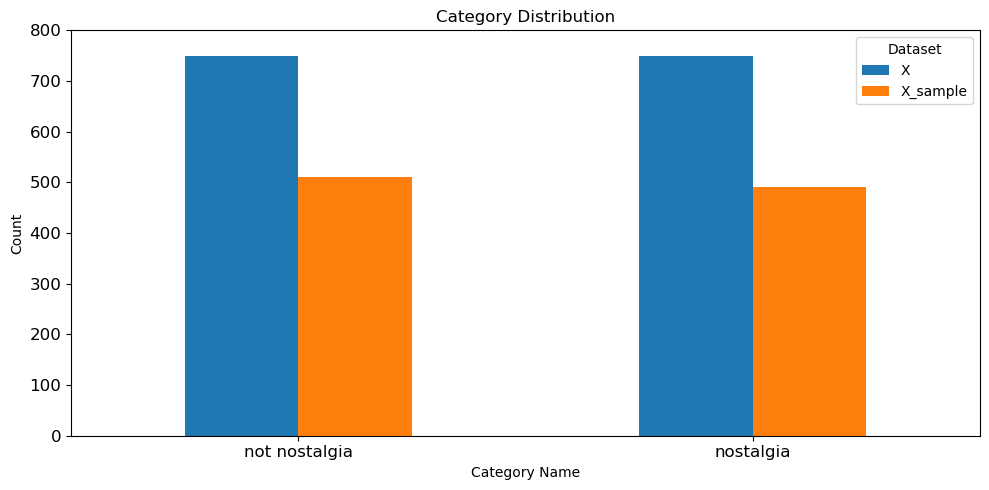

In [61]:
# Answer here
# do a side-by-side comparison of the distribution between the two datasets(X, X_sample) with one plot
# Assuming X and X_sample are dataframes that contain a 'category_name' column
# Get the value counts for both datasets
X_counts = X['category_name'].value_counts()
X_sample_counts = X_sample['category_name'].value_counts()

# Combine both counts into a dataframe for easier plotting
df_counts = pd.DataFrame({
    'X': X_counts,
    'X_sample': X_sample_counts
}).fillna(0)

# Specify the desired order of the categories
category_order = ['not nostalgia', 'nostalgia']

# Reindex the dataframe to match the specified order
df_counts = df_counts.reindex(category_order)

# Plot the combined dataframe as a grouped bar chart
df_counts.plot(kind='bar', title='Category Distribution', rot=0, fontsize=12, figsize=(10,5))

# Add labels and title
plt.ylabel('Count')
plt.xlabel('Category Name')
plt.legend(title='Dataset')
plt.ylim([0, max(df_counts.max()) + 50])  # Adjust y-limit based on the maximum value
plt.tight_layout()
plt.show()

---

### 5.2 Feature Creation

In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/gp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [64]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

If you take a closer look at the `X` table now, you will see the new columns `unigrams` that we have added. You will notice that it contains an array of tokens, which were extracted from the original `text` field. At first glance, you will notice that the tokenizer is not doing a great job, let us take a closer at a single record and see what was the exact result of the tokenization using the `nltk` library.

In [65]:
X[0:4]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   

   category_name                                           unigrams  
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...  
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...  
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [66]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

---

### 5.3 Feature subset selection

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


Now you can also see some examples of what each feature is based on their index in the vector:

In [68]:
count_vect.get_feature_names_out()[1000]

'dj'

In [69]:
count_vect.get_feature_names_out()[750]

'comment'

In [70]:
count_vect.get_feature_names_out()[500]

'bond'

In [71]:
count_vect.get_feature_names_out()[250]

'amen'

In [72]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [73]:
# Answer here
# How do we turn our array[0] text document into a tokenized text using the build_analyzer()?
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

---

In [74]:
# We can check the shape of this matrix by:
X_counts.shape

(1500, 3730)

In [75]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [76]:
X_counts.shape

(1500, 3730)

In [77]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [78]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [79]:
# Answer here
# Convert the counts to an array (assuming you're working with a sparse matrix)
X_array = X_counts[0:5, 0:100].toarray()

# Select the fifth record
fifth_record = X_array[4]

# Use NumPy to find indices where the value is 1
terms = np.where(fifth_record == 1)[0]

# Retrieve the corresponding feature names for these indices
matching_words = count_vect.get_feature_names_out()[terms]

# Convert to a list to match the reference answer output style
matching_words_list = matching_words.tolist()

# Output the result
print(terms)
print(matching_words_list)

[]
[]


---

In [80]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [81]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [82]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

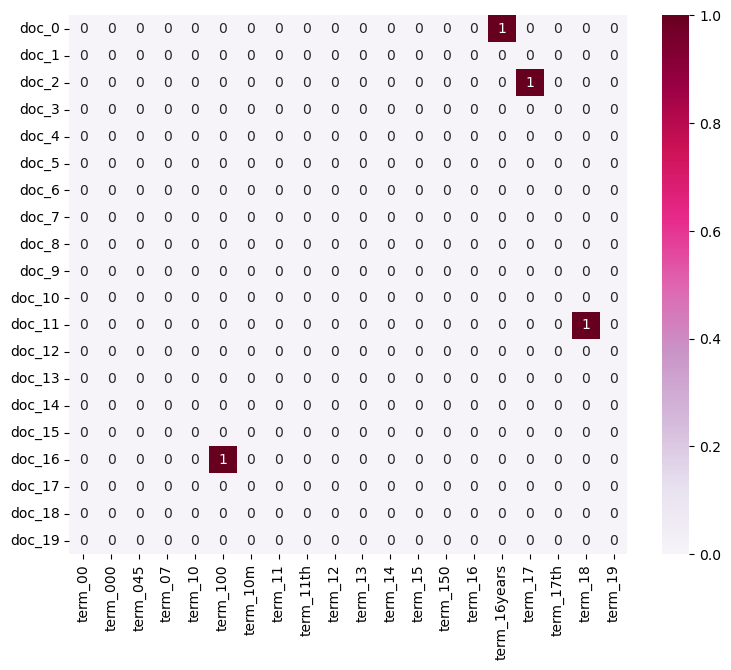

In [83]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

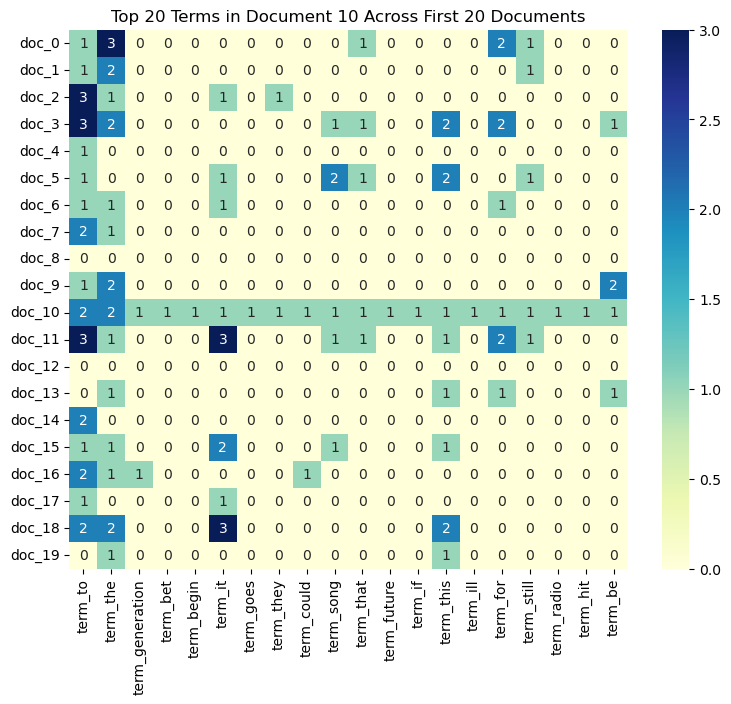

In [84]:
# Answer here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the array from X_counts
X_array = X_counts.toarray()

# Get the term frequencies across all documents for document 10
doc_10_term_frequencies = X_array[10, :]

# Sort the term indices by frequency (highest to lowest)
sorted_term_indices = np.argsort(doc_10_term_frequencies)[::-1]

# Select the top 20 most frequent terms in document 10
top_20_terms = sorted_term_indices[:20]

# Retrieve the corresponding term names
top_20_term_names = count_vect.get_feature_names_out()[top_20_terms]

# Define document and term labels for plotting
plot_x = ["term_" + str(i) for i in top_20_term_names]
plot_y = ["doc_" + str(i) for i in range(20)]  # Use the first 20 documents for comparison

# Create the subset matrix for the first 20 documents and top 20 terms
plot_z = X_array[0:20, top_20_terms]

# Create a DataFrame for the heatmap
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot the heatmap
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="YlGnBu", vmin=0, vmax=plot_z.max(), annot=True)
plt.title("Top 20 Terms in Document 10 Across First 20 Documents")
plt.show()


---

### 5.4 Attribute Transformation / Aggregation

In [85]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [86]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [87]:
term_frequencies[0] #sum of first term: 00

1

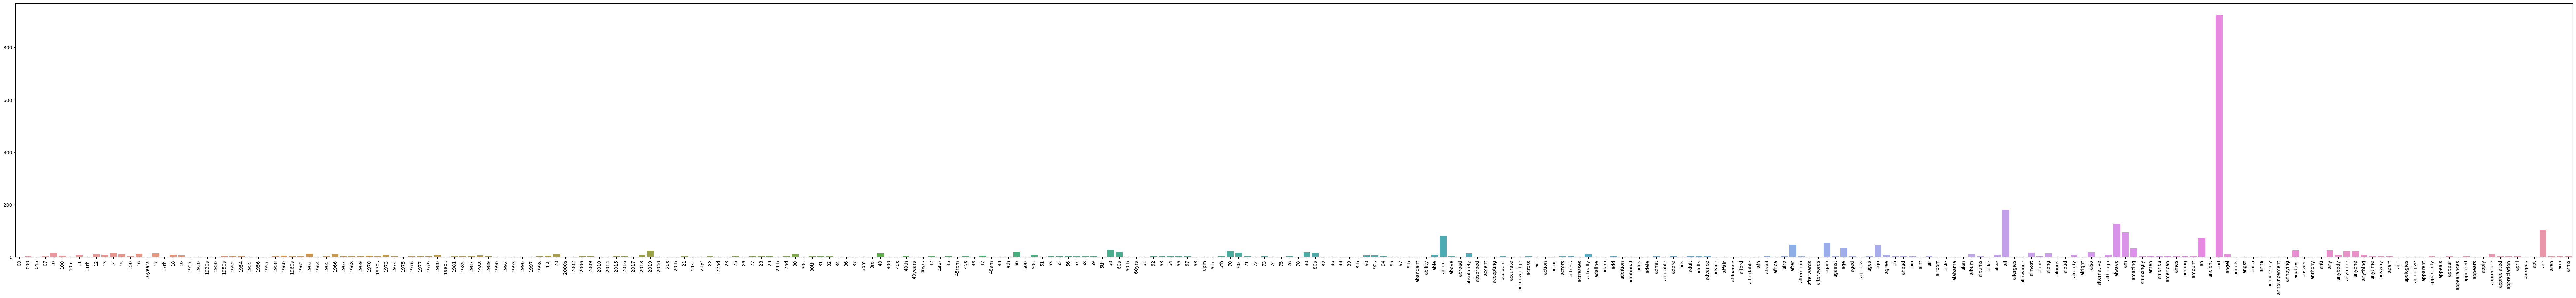

In [88]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 12 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [89]:
# Answer here
import numpy as np
import plotly.express as px
import pandas as pd

# Calculate term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]  # Sum term frequencies across all documents

# Create a DataFrame for better plotting
df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Select the top 300 terms for visualization
df_terms_top = df_terms.iloc[:300]  # Assuming you only want to plot the first 300 terms

# Create an interactive Plotly bar chart
fig = px.bar(df_terms_top, 
             x='Term', 
             y='Frequency', 
             title='Top 300 Term Frequencies',
             labels={'Term': 'Term', 'Frequency': 'Frequency'})

# Customize layout (optional) for better readability
fig.update_layout(
    xaxis_tickangle=-90,  # Rotate the x-axis labels
    height=600,           # Set the height of the chart
    width=1000,           # Set the width of the chart
    margin=dict(l=40, r=40, t=40, b=150),  # Adjust the margins to fit labels
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Display the interactive plot
fig.show()


---

### >>> **Exercise 13 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [90]:
# Answer here
import numpy as np
import plotly.graph_objects as go

# Calculate term frequencies across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Get the indices of the top 100 most frequent terms
top_k = 100
top_k_indices = np.argsort(term_frequencies)[::-1][:top_k]

# Get the terms and their frequencies
top_k_terms = count_vect.get_feature_names_out()[top_k_indices]
top_k_frequencies = term_frequencies[top_k_indices]

# Create a bar chart using Plotly to visualize the top K frequent terms
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_k_terms, 
    y=top_k_frequencies,
))

# Customize the layout for better readability
fig.update_layout(
    title=f'Top {top_k} Frequent Terms',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,
    height=600,
    width=1000,
)

# Show the plot
fig.show()


In [91]:
import random

# Randomly sample 100 terms from the vocabulary
sample_size = 100
random_indices = random.sample(range(len(term_frequencies)), sample_size)

# Get the terms and frequencies for the random sample
sampled_terms = count_vect.get_feature_names_out()[random_indices]
sampled_frequencies = term_frequencies[random_indices]

# Create a bar chart for the randomly sampled terms
fig = go.Figure()
fig.add_trace(go.Bar(
    x=sampled_terms, 
    y=sampled_frequencies,
    marker=dict(color='rgba(44, 160, 44, 0.8)'),
))

# Customize layout
fig.update_layout(
    title=f'Randomly Sampled {sample_size} Terms',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,
    height=600,
    width=1000,
)

fig.show()


---

### >>> **Exercise 14 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below


In [92]:
# Answer here
import numpy as np
import plotly.graph_objects as go

# Calculate term frequencies across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Get the indices of the top 100 most frequent terms
top_k = 100
top_k_indices = np.argsort(term_frequencies)[::-1][:top_k]

# Get the terms and their frequencies
top_k_terms = count_vect.get_feature_names_out()[top_k_indices]
top_k_frequencies = term_frequencies[top_k_indices]

# Create a bar chart using Plotly to visualize the top K frequent terms
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_k_terms, 
    y=top_k_frequencies,
))

# Customize the layout for better readability
fig.update_layout(
    title=f'Top {top_k} Frequent Terms',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,
    height=600,
    width=1000,
)

# Show the plot
fig.show()


---

In [93]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

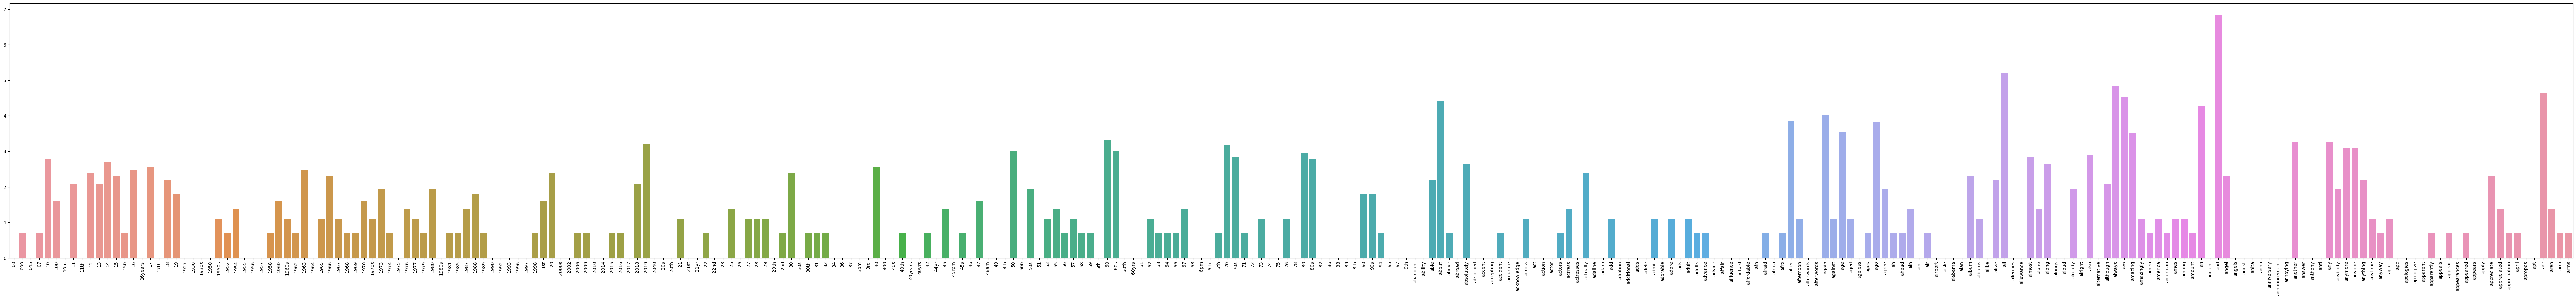

In [94]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 15 (take home):** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

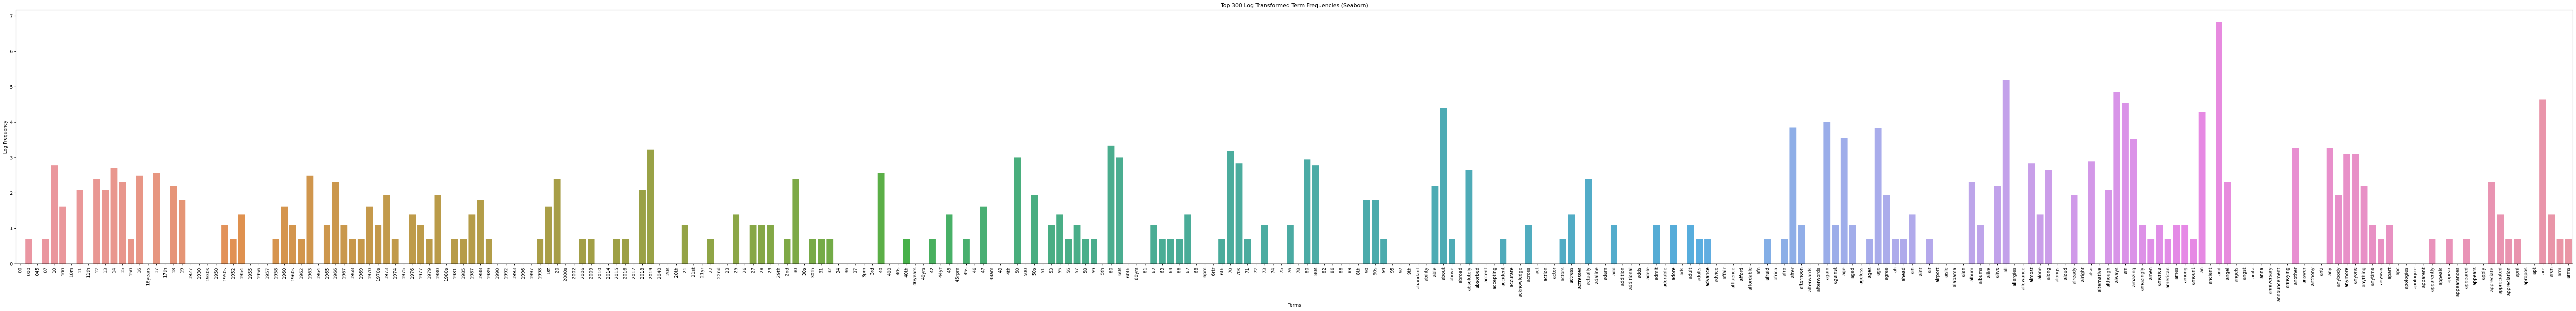

In [95]:
# Answer here
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# calculate the log-transformed term frequencies
term_frequencies_log = [math.log(i) if i > 0 else 0 for i in term_frequencies]  # 避免對零取對數

# build a DataFrame for better plotting
df_terms = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Log Frequency': term_frequencies_log
})

# choose the top 300 terms for visualization
df_terms_top = df_terms.iloc[:300]

# Create an interactive Plotly bar chart
fig = px.bar(df_terms_top, 
             x='Term', 
             y='Log Frequency', 
             title='Top 300 Log Transformed Term Frequencies',
             labels={'Term': 'Term', 'Log Frequency': 'Log Frequency'})

fig.update_layout(
    xaxis_tickangle=-90,  
    height=600,           
    width=1000,          
    margin=dict(l=40, r=40, t=40, b=150),   
    xaxis_title="Terms",
    yaxis_title="Log Frequency"
)

# use seaborn to plot the top 300 log transformed term frequencies
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_terms_top['Term'], y=df_terms_top['Log Frequency'])
g.set_xticklabels(df_terms_top['Term'], rotation=90)
plt.title('Top 300 Log Transformed Term Frequencies (Seaborn)')
plt.xlabel('Terms')
plt.ylabel('Log Frequency')
plt.show()


###  Finding frequent patterns
Perfect, so now that we know how to interpret a document-term matrix from our text data, we will see how to get extra insight from it, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

In [96]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [97]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   
749   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  
748     1         0      0        0    0    0        0      0  
749     0         0      0        0    0    0        0      0  

[750 rows x 2602 columns]

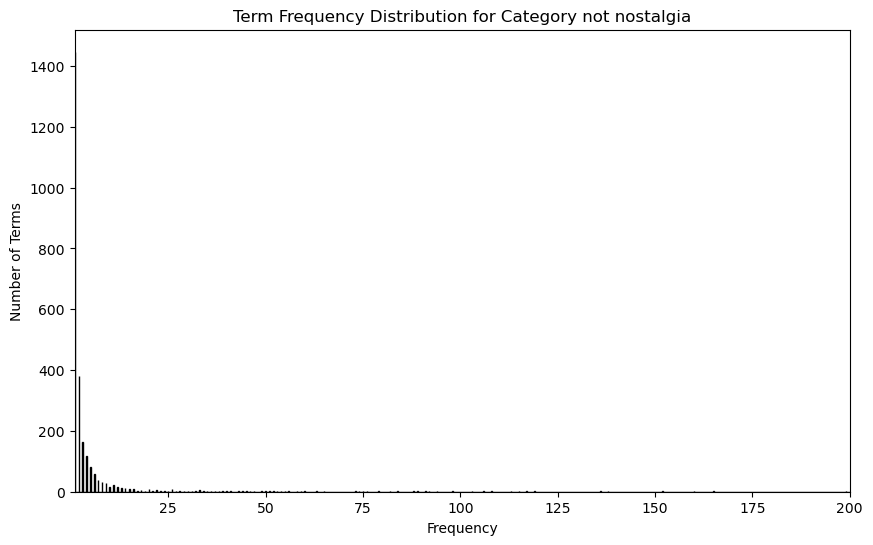

In [98]:
 # Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [99]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'what', 'on', 'not', 'be', 'voice', 'can', 'me', 'just', 'beautiful', 'as', 'songs', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'never', 'know', 'now', 'about', 'much', 'who', 'really', 'more', 'we', 'if', 'best', 'by', 'ever', 'thank', 'would', 'think', 'still', 'only', 'don', 'how', 'very', 'has', 'there', 'am', 'out', 'could', 'him', 'these', 'old', 'an', 'up', 'do', 'listen', 'hear', 'singer', 'had', 'many', 'here', 'such', 'too', 'today', 'version', 'been', 'world', 'heard', 'most', 'your', 'get', 'people', 'some', 'video', 'man', 'sing', 'listening', 'real', 'than', 'were', 'years', 'nice', 'singing', 'heart', 'their', 'better', 'life', 'day', 'its', 'way', 'did', 'god', 'come', '

Here we can explore the frequencies of the **top 5%** words:

In [100]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 453, 451, ...,   1,   1,   1])

In [101]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0])

In [102]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

708

In [103]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [104]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 453, 708])

In [105]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   0, 1510, 1509, ...,  160, 2290, 2276])

In [106]:
filt_term_document_dfs[categories[category_number]].loc[:,'this'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

453

In [107]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
first       23
classic     23
amazing     24
wish        24
make        25
          ... 
of         361
to         394
and        451
this       453
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row         

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   
749    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  
749           0         0      0        0    0    0        0      0  

[750 rows x 2446 columns]

### >>> **Exercise 16 (take home):** 
Review the words that were filtered in each category and comment about the differences and similarities that you can see.

In [289]:
# Answer here

In the output, we see two groups of words filtered from the "comp.graphics" category.

- For the **bottom 1% of words**, we have terms like `initworld`, `jkpg`, and `jiu`, which only appear once. These rare terms don’t really add value to our analysis, so it's smart to remove them as they just clutter the data.

- For the **top 5% of words**, we see common terms like `of`, `the`, and `and`, along with some specific terms related to computer graphics. While these high-frequency words may seem important, they often don’t help in distinguishing the main topics because they’re too generic. That's why we filter them out—they tend to dominate the analysis without providing useful insights.

So, the bottom 1% gets removed because they’re not useful, while the top 5% is filtered out to eliminate common words that could overshadow the more meaningful terms. This way, we can focus on the more unique and relevant vocabulary that truly reflects the category's themes.

Great! Now that our document-term frequency dataframe is ready, we can proceed with the frequent pattern mining process. To do this, we first need to convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.

A key step in this process is defining the threshold that determines when a value in the data is considered a transaction. As we observed in the previous cell, there are **many zeros** in our dataframe, which indicate that certain words do not appear in specific documents. With this in mind, we'll set the transactional threshold to be **greater than or equal to 1**. This means that for each document/transaction, we will include all the words that occur at least once (after filtering), ensuring that only relevant words are included in the pattern mining process. For your reference you can also check the following real world example that the PAMI library provides to review how they chose the threshold to generate the transactional data: [Air Pollution Analytics - Japan](https://colab.research.google.com/github/udayLab/PAMI/blob/main/notebooks/airPollutionAnalytics.ipynb). 

#### The next part of the code will take a couple of minutes to execute, for simplicity I already shared the resulting files from it, to continue onwards

In [108]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


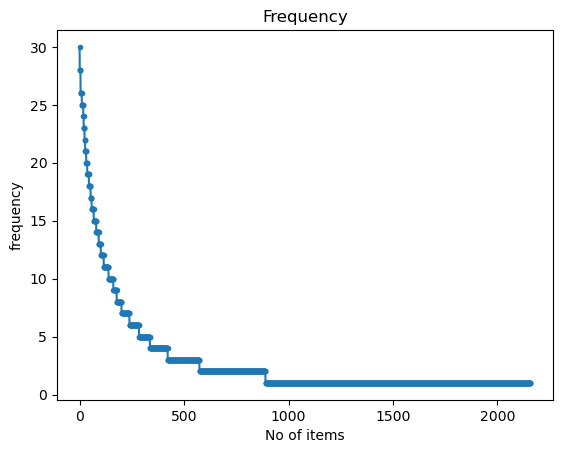

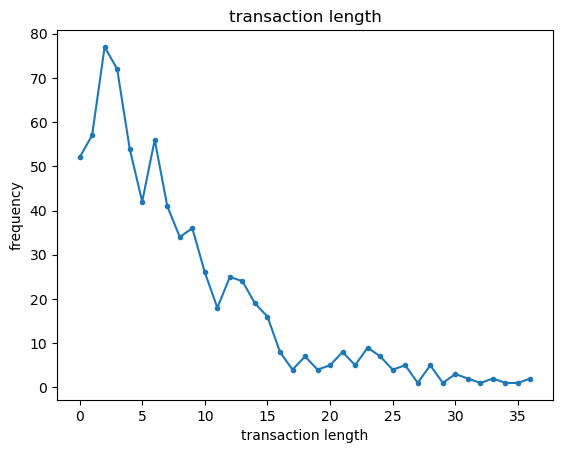

In [109]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 744
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.416666666666666
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.952413594380544
Variance in Transaction Sizes : 35.47891431135038
Sparsity : 0.996559007904061


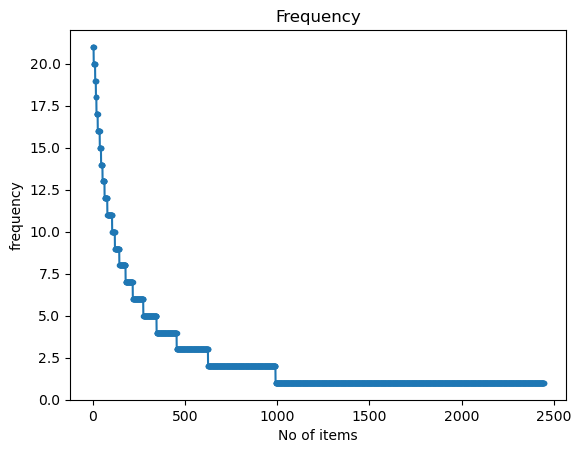

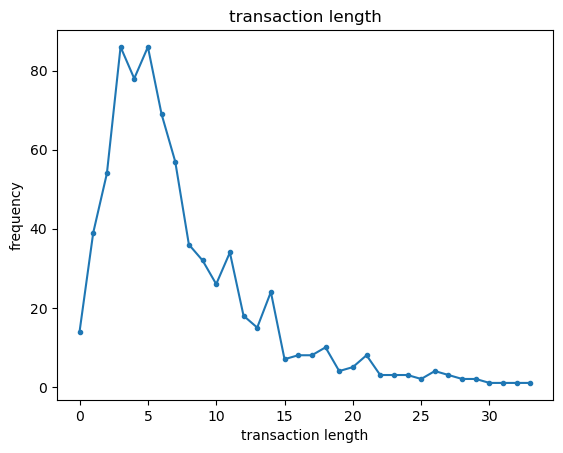

In [110]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [111]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.011361837387084961


In [112]:
obj1.save('freq_patterns_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0        find        9
1        down        9
2         few        9
3         its        9
4        sure        9
..        ...      ...
175      ever       28
176     would       28
177      will       28
178        go       28
179  favorite       30

[180 rows x 2 columns]

In [113]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.008906126022338867


In [114]:
obj2.save('freq_patterns_not_nostalgia_minSup9.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0    favorites        9
1      special        9
2         soul        9
3         mind        9
4           60        9
..         ...      ...
139      elvis       21
140      every       21
141      loved       21
142       them       21
143     lyrics       21

[144 rows x 2 columns]

In [115]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
127      will       28
126     would       28
125      ever       28
123        or       26
120       kid       26
..        ...      ...
142  handsome        9
143   perfect        9
144        ll        9
145     happy        9
0         its        9

[220 rows x 2 columns]
Number of patterns discarded: 104


In [116]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df



00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
0      0    0    0   0   0    0    0   0     0   0  ...       0       0   
1      0    0    0   0   0    0    0   0     0   0  ...       0       0   
2      0    0    0   0   0    0    0   0     0   0  ...       0       0   
3      0    0    0   0   0    0    0   0     0   0  ...       0       0   
4      0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1495   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1496   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1497   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1499   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
0          0       0     0         0        0   0      0    0  
1          0       0     0         0        0   0      0    0  
2          0       0     0         0        0   0      0    0  
3          0       0     0         0        0   0      0    0  
4          0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1495       0       0     0         0        0   0      0    0  
1496       0       0     0         0        0   0      0    0  
1497       0       0     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  
1499       0       0     0         0        0   0      0    0  

[1500 rows x 3950 columns]

### >>> **Exercise 17 (take home):** 
Implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'comp.graphics' category in our processed database. **Only implement the mining part of the algorithm and display the resulting patterns**, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. Document your findings, focusing on differences and similarities in the outputs and performance.

In [117]:
import time
import pandas as pd
from FAE import FAE  # Ensure proper import

# Set the values of k to test
k_values = [100, 500, 800]

# Run the FAE Top-K algorithm for each k value
for k in k_values:
    print(f"Running FAE Top-K with k = {k}")

    # Start timing
    start_time = time.time()

    # Initialize FAE object, assuming the FAE class has parameters iFile and k
    obj2 = FAE(iFile='td_freq_db_nostalgia.csv', k=k)

    # Perform mining
    obj2.mine()

    # Extract patterns as a DataFrame
    patterns_df = obj2.getPatternsAsDataFrame()

    # Calculate runtime
    runtime = time.time() - start_time

    # Display total number of patterns and runtime
    print(f"Total No of patterns for k = {k}: {len(patterns_df)}")
    print(f"Runtime for k = {k}: {runtime:.2f} seconds")

    # Display the first 10 patterns
    print(f"Patterns (first 10) for k = {k}:")
    print(patterns_df.head(10))

Running FAE Top-K with k = 100
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k = 100: 100
Runtime for k = 100: 0.02 seconds
Patterns (first 10) for k = 100:
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28
5       kid       26
6      only       26
7      such       26
8      them       26
9        or       26
Running FAE Top-K with k = 500
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns for k = 500: 500
Runtime for k = 500: 0.10 seconds
Patterns (first 10) for k = 500:
   Patterns  Support
0  favorite       30
1      ever       28
2     would       28
3      will       28
4        go       28
5       kid       26
6      only       26
7      such       26
8      them       26
9        or       26
Running FAE Top-K with k = 800
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patt

Summary of Differences:
- There is a clear difference in runtime as `k` increases, with the runtime nearly doubling from 0.02 seconds (for `k = 100`) to 0.1 seconds (for `k = 500`).
- As `k` increases, the total number of patterns also increases, reflecting the functionality of the FAE Top-K algorithm.

Summary of Similarities:
- The top patterns and their support values remain consistent between different `k` values, indicating that the most frequent patterns are always captured, regardless of the total number of patterns generated.
- The runtime increases with larger `k` values, but the scaling seems manageable and proportional to the number of patterns being generated.

---

### 5.5 Dimensionality Reduction
Dimensionality reduction is a powerful technique for tackling the "curse of dimensionality," which commonly arises due to data sparsity. This technique is not only beneficial for visualizing data more effectively but also simplifies the data by reducing the number of dimensions without losing significant information. For a deeper understanding, please refer to the additional notes provided.

In [118]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [119]:
X_pca_tdm.shape

(1500, 2)

In [120]:
X_tsne_tdm.shape

(1500, 2)

In [121]:
X_umap_tdm.shape

(1500, 2)

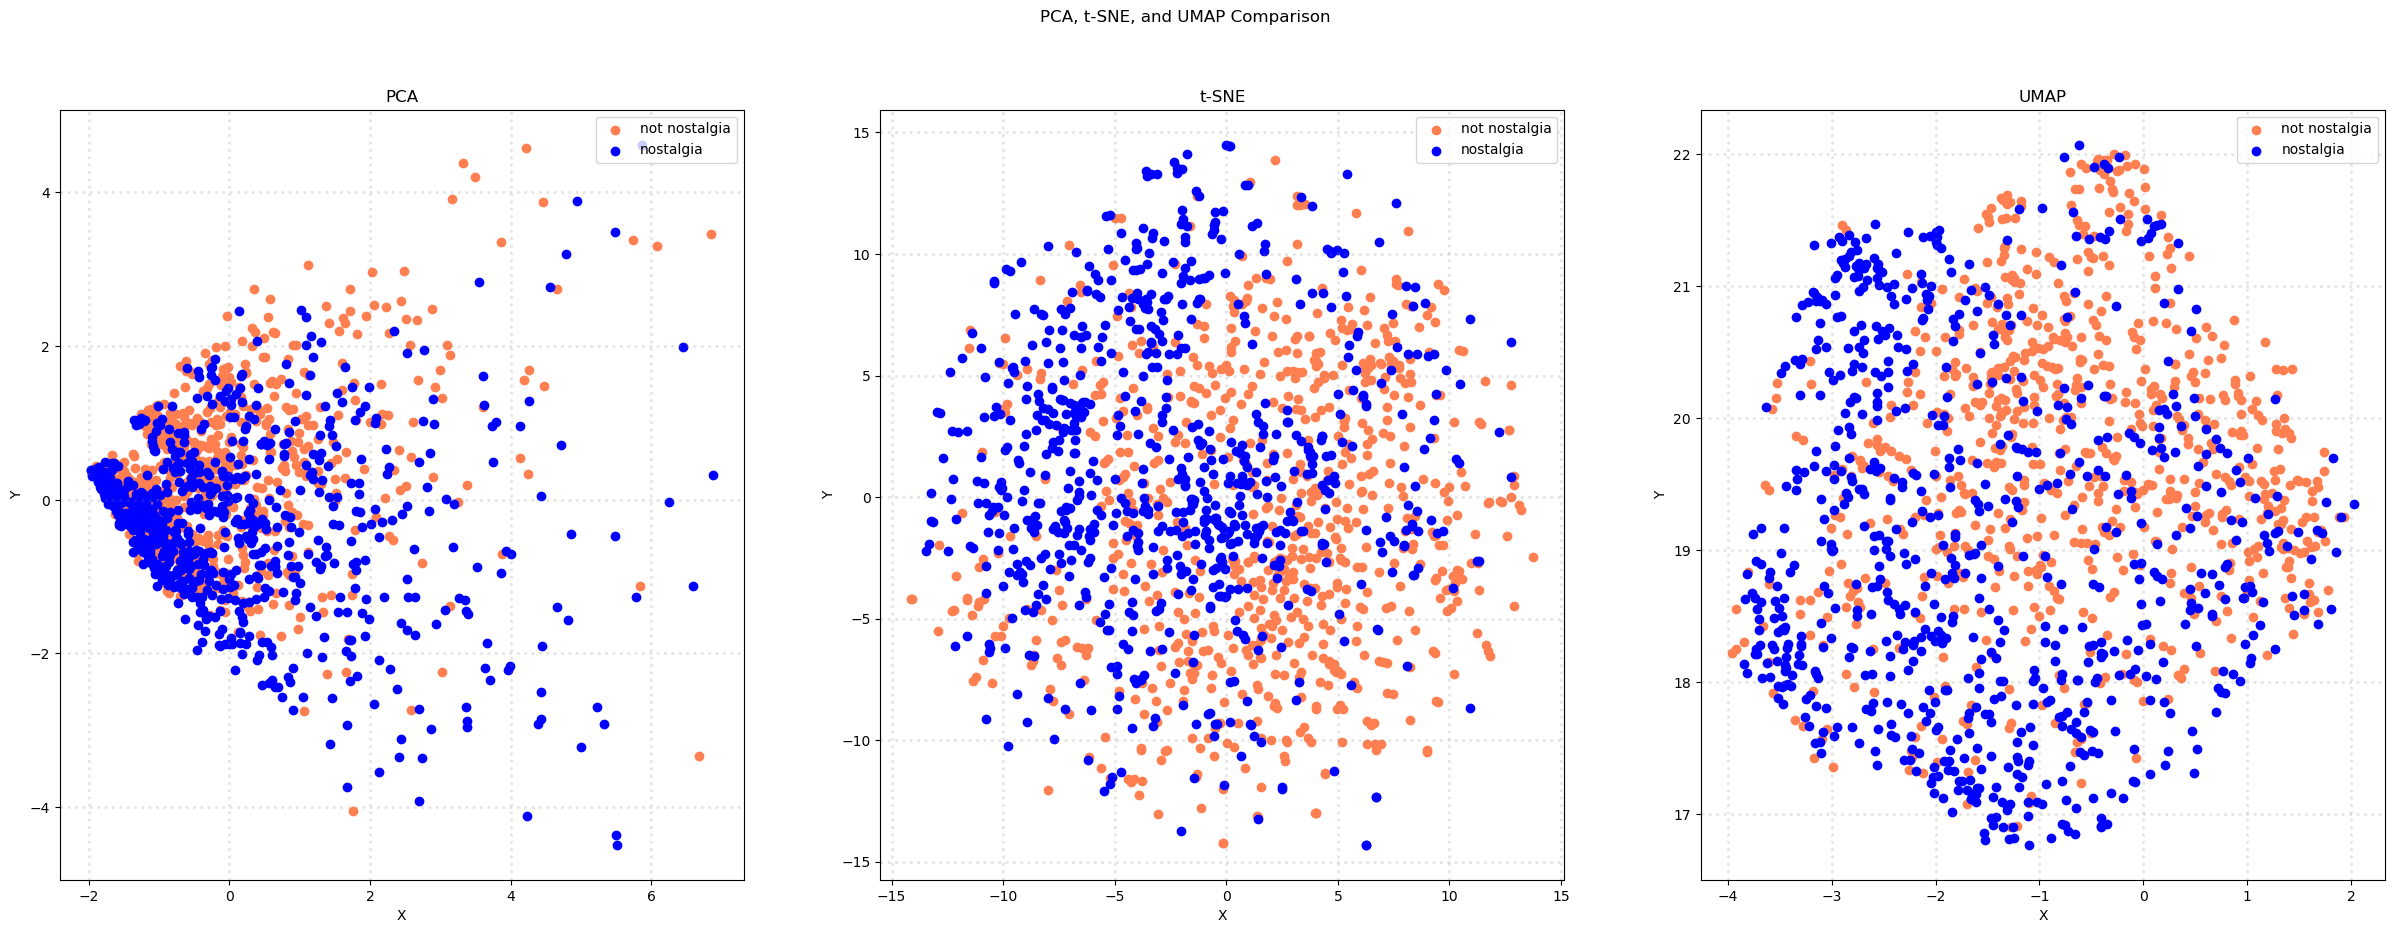

In [122]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [123]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

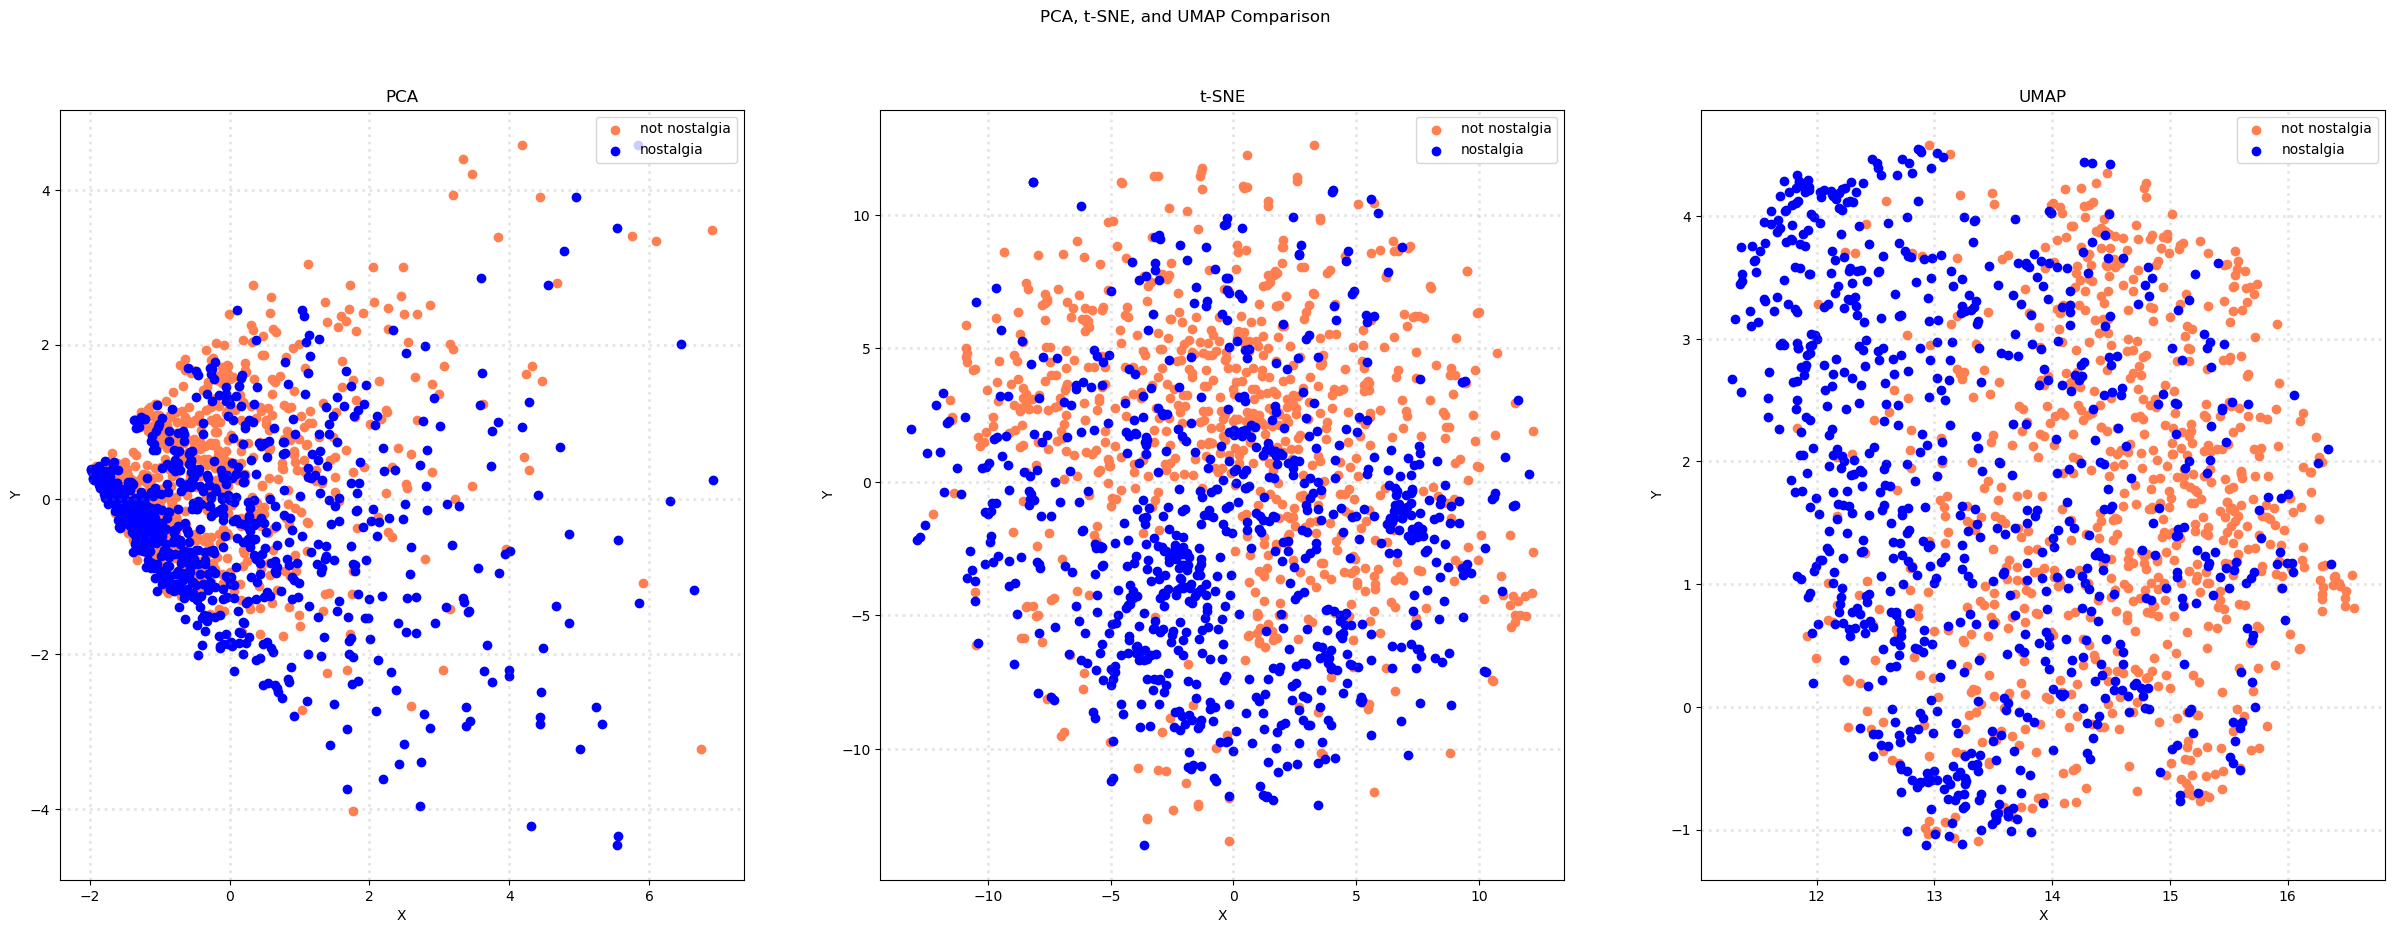

In [124]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

### >>> Exercise 18 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [125]:
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

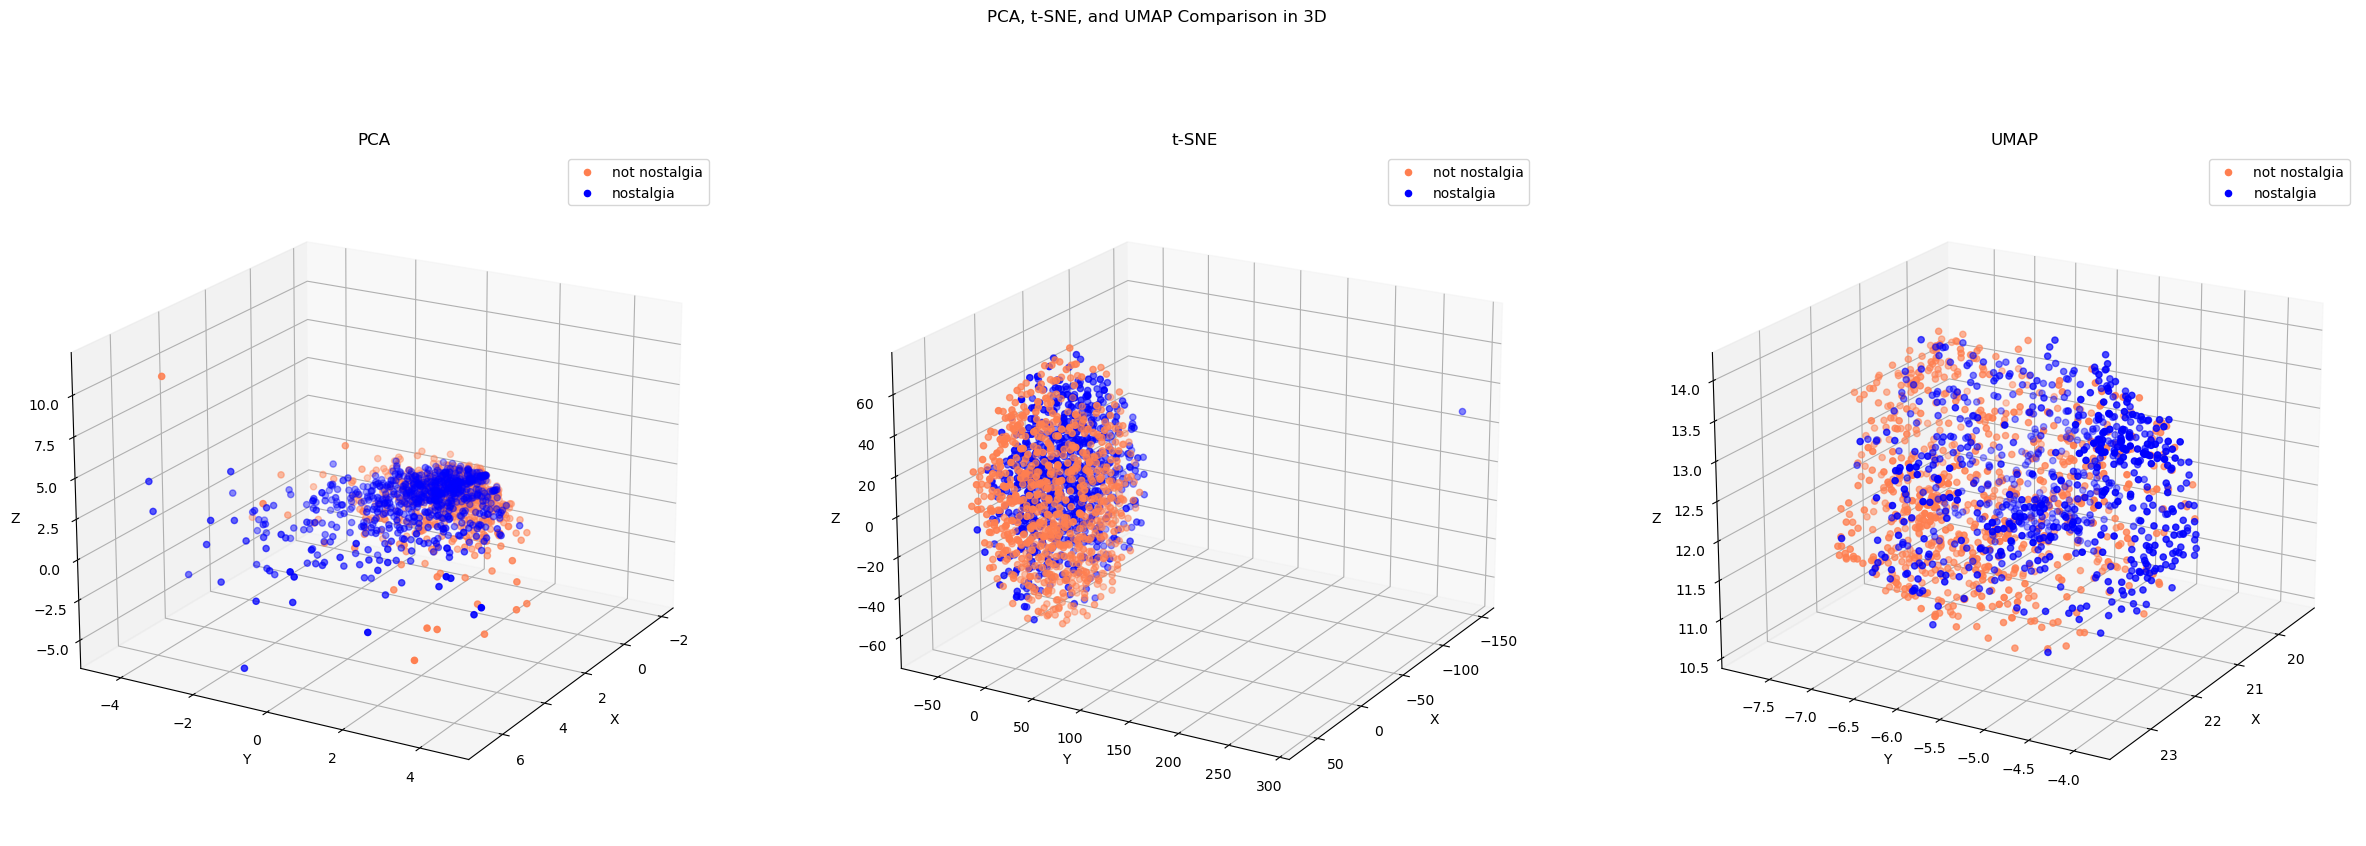

In [126]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# create a figure to hold the subplots
fig = plt.figure(figsize=(30, 10))  # set the figure size
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)  # set the 3D view angle
    ax.legend(loc='upper right')

# create 3 subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax1, X_pca_aug, 'PCA', elev=20, azim=30)
plot_scatter_3d(ax2, X_tsne_aug, 't-SNE', elev=20, azim=30)
plot_scatter_3d(ax3, X_umap_aug, 'UMAP', elev=20, azim=30)

plt.show()

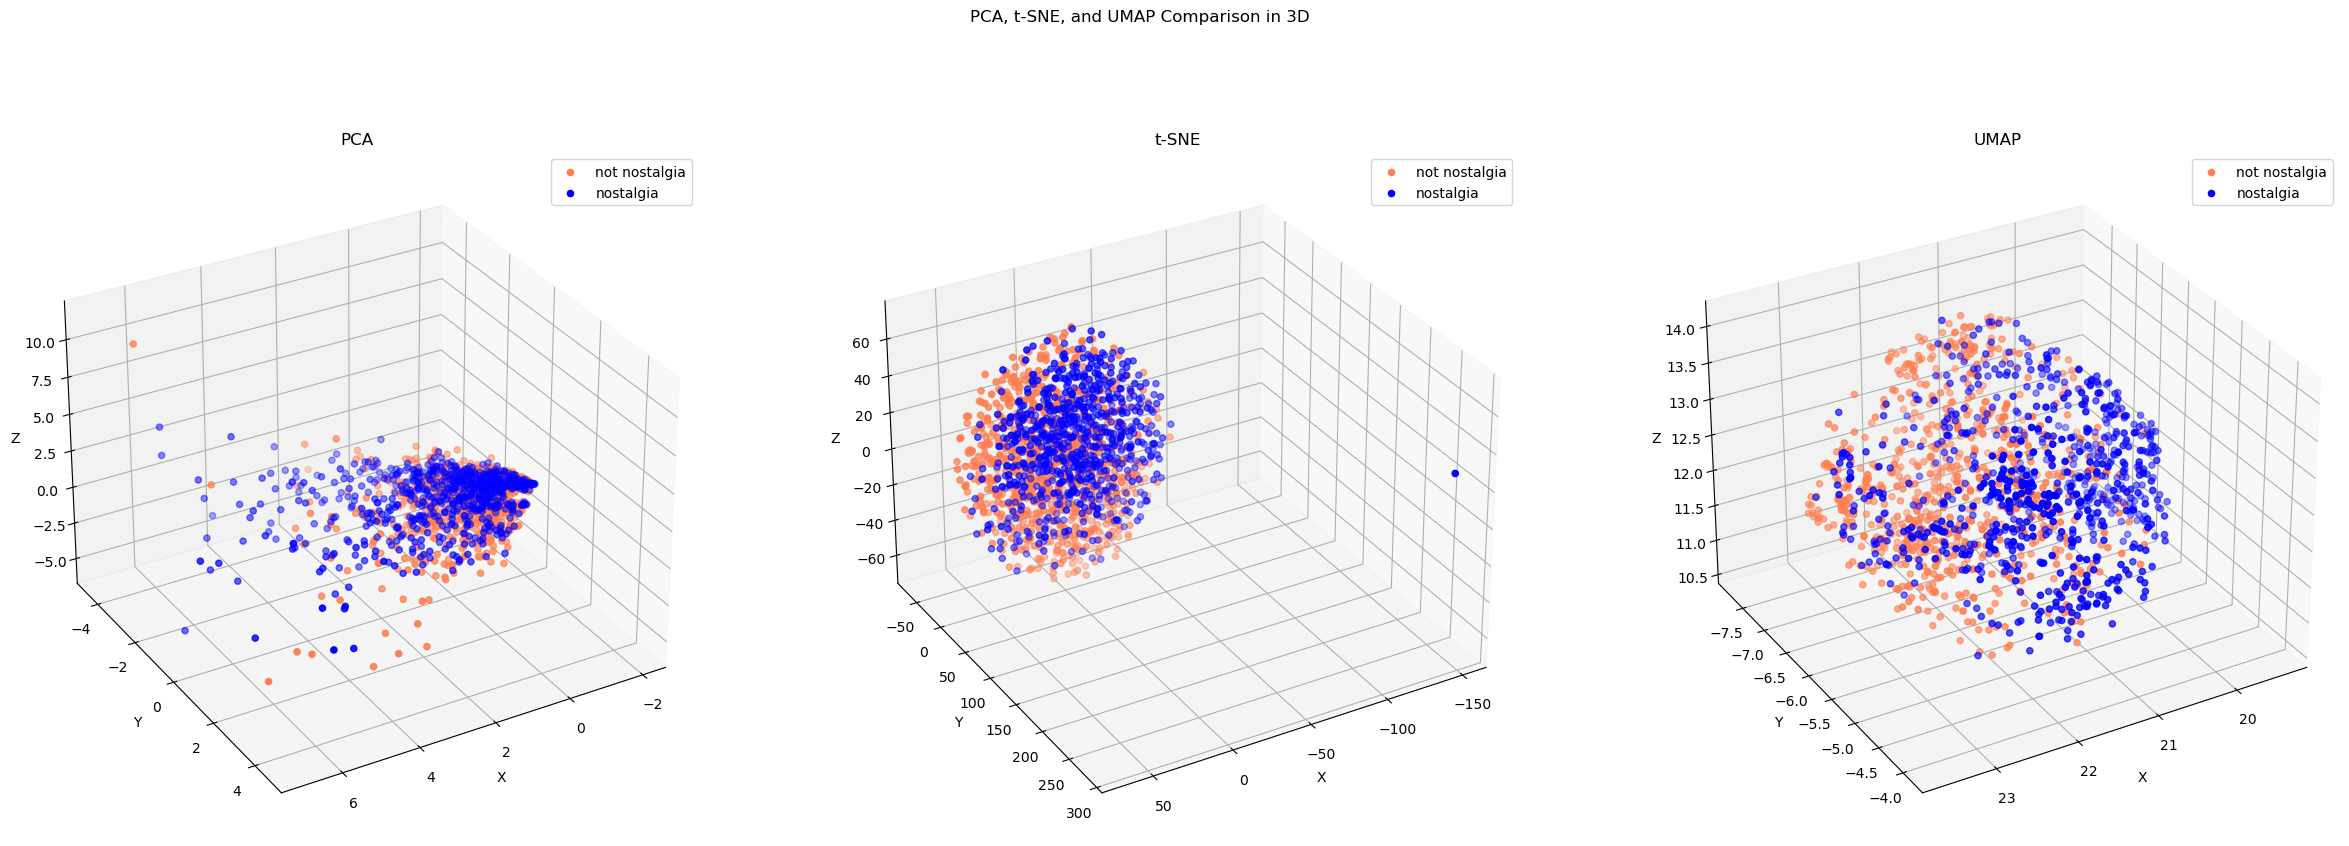

In [127]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# create a figure to hold the subplots
fig = plt.figure(figsize=(30, 10))  # set the figure size
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)  # set the 3D view angle
    ax.legend(loc='upper right')

# create 3 subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax1, X_pca_aug, 'PCA', elev=30, azim=60)
plot_scatter_3d(ax2, X_tsne_aug, 't-SNE', elev=30, azim=60)
plot_scatter_3d(ax3, X_umap_aug, 'UMAP', elev=30, azim=60)

plt.show()

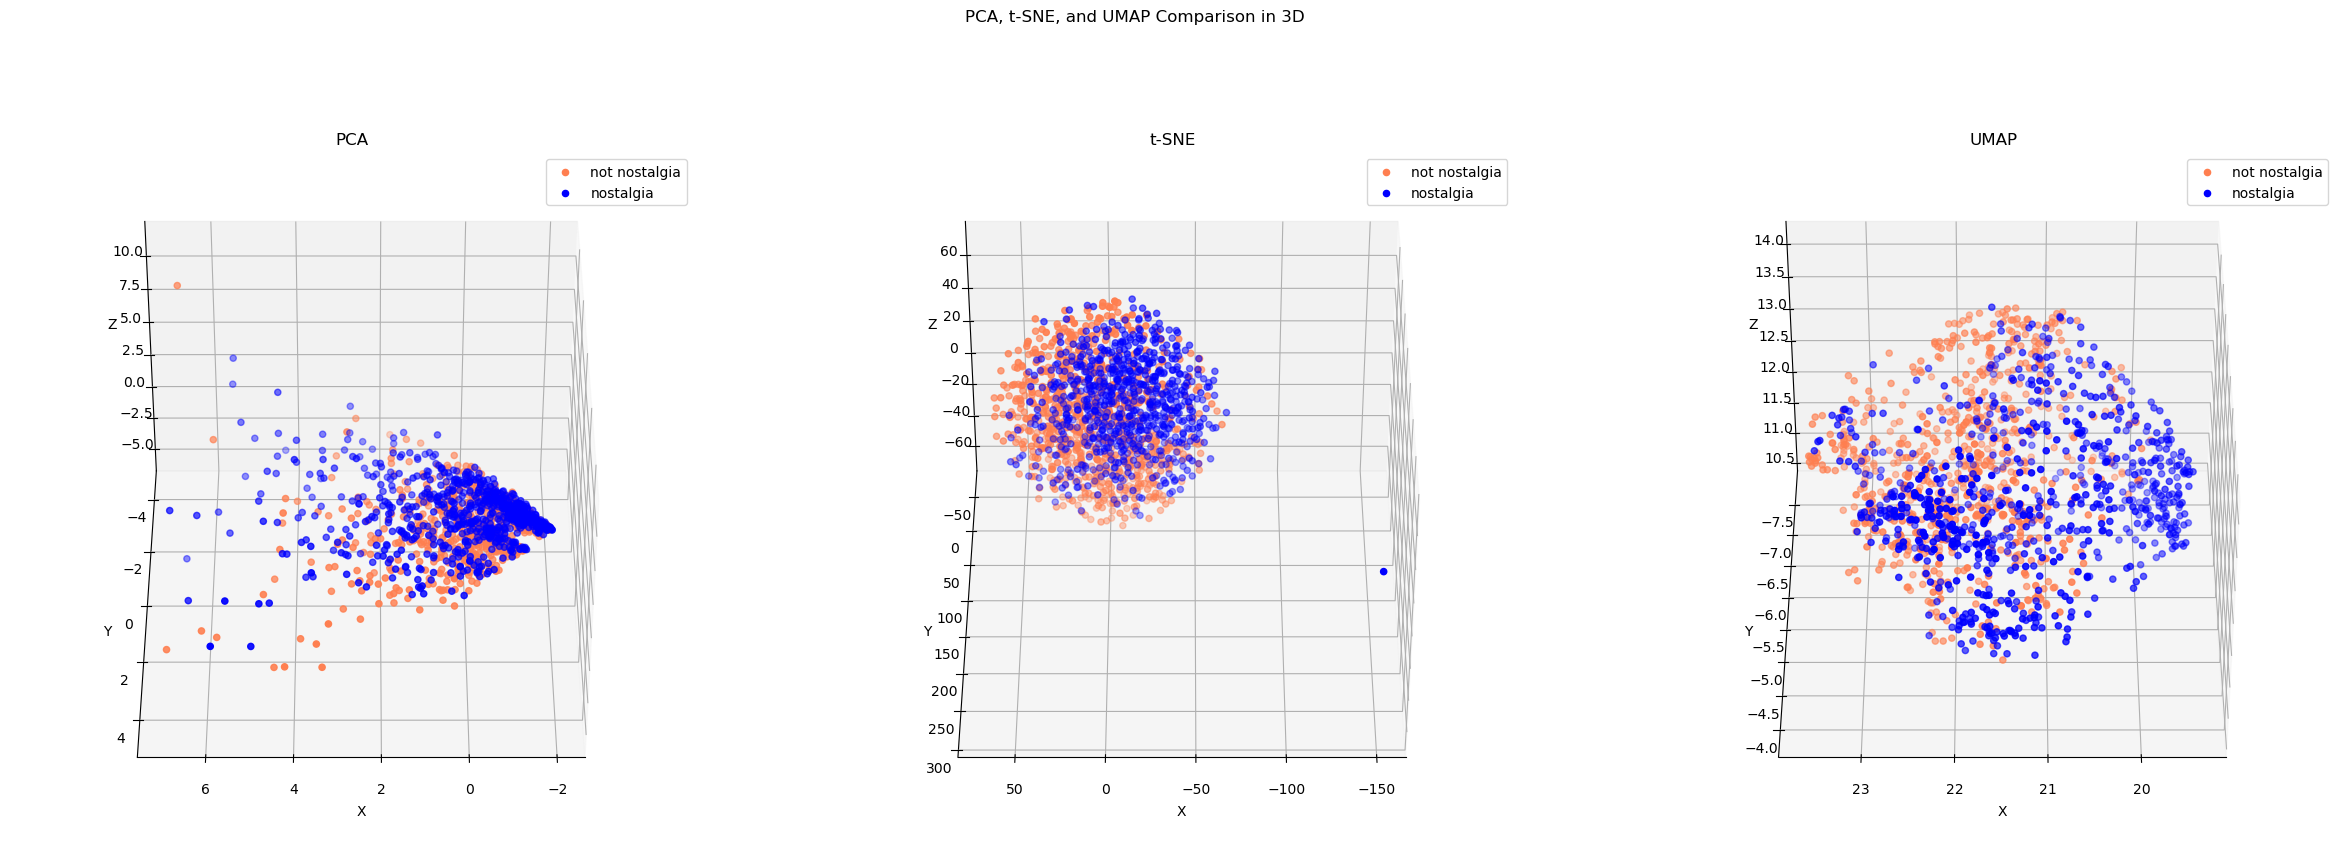

In [128]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# create a figure to hold the subplots
fig = plt.figure(figsize=(30, 10))  # set the figure size
fig.suptitle('PCA, t-SNE, and UMAP Comparison in 3D')

# define a function to create a 3D scatter plot for each method
def plot_scatter_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)  # set the 3D view angle
    ax.legend(loc='upper right')

# create 3 subplots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# create 3D scatter plots for PCA, t-SNE, and UMAP
plot_scatter_3d(ax1, X_pca_aug, 'PCA', elev=40, azim=90)
plot_scatter_3d(ax2, X_tsne_aug, 't-SNE', elev=40, azim=90)
plot_scatter_3d(ax3, X_umap_aug, 'UMAP', elev=40, azim=90)

plt.show()

After reducing the image data to 3 dimensions using PCA, I plotted the result from three different angles:

1. Elevation: 20°, Azimuth: 30°
2. Elevation: 30°, Azimuth: 60°
3. Elevation: 40°, Azimuth: 90°

Each view shows that the images were quite similar or identical in their reduced 3D space, as all the data points appear concentrated in a very small region. This suggests that there is very little variation in the images after dimension reduction, likely because the original images were highly similar.

---

### 5.6 Discretization and Binarization

In [129]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [130]:
mlb = preprocessing.LabelBinarizer()

In [131]:
mlb.fit(X.category)

LabelBinarizer()

In [132]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [133]:
X[0:9]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   

   category_name                                           unigrams  \
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...   
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...   
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4      nostalgia  [listening, to, his, songs, reminds, me, of, m...   
5      nostalgia  [Every, time, I, heard, this, song, as, a, chi...   
6      nostalgia  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7      nostalgia  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8  not nostalgia   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {great, voice, now,, age, Although, Thank, Ree...          [0]  
1  {voice, an, love, kid, angel, when, to, of, I,...          [1]  
2  {around., --, great, age, graduated, grow, lea...          [1]  
3  {receive., this, song, hope, Thank, leave, Mar...          [0]  
4  {his, songs, to, reminds, me, of, who, listeni...          [1]  
5  {this, song, voice, over, fear, reminded, got,...          [1]  
6  {teenager, loved, things., Time, My, when, to,...          [1]  
7  {music., he, LISTENED, Reeves, comes, love, no...          [1]  
8        {heart, Wherever, always, are, in, you, my}          [0]

---

### >>> **Exercise 19 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [134]:
# Answer here
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

sentiment                                            comment  category  \
0  not nostalgia  He was a singer with a golden voice that I lov...         0   
1      nostalgia  The mist beautiful voice ever I listened to hi...         1   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         1   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         0   
4      nostalgia  listening to his songs reminds me of my mum wh...         1   
5      nostalgia  Every time I heard this song as a child, I use...         1   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...         1   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...         1   
8  not nostalgia           Wherever you  are you always in my heart         0   

   category_name                                           unigrams  \
0  not nostalgia  [He, was, a, singer, with, a, golden, voice, t...   
1      nostalgia  [The, mist, beautiful, voice, ever, I, listene...   
2      nostalgia  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  not nostalgia  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4      nostalgia  [listening, to, his, songs, reminds, me, of, m...   
5      nostalgia  [Every, time, I, heard, this, song, as, a, chi...   
6      nostalgia  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7      nostalgia  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8  not nostalgia   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_category  
0  {great, voice, now,, age, Although, Thank, Ree...          [1]  
1  {voice, an, love, kid, angel, when, to, of, I,...          [0]  
2  {around., --, great, age, graduated, grow, lea...          [0]  
3  {receive., this, song, hope, Thank, leave, Mar...          [1]  
4  {his, songs, to, reminds, me, of, who, listeni...          [0]  
5  {this, song, voice, over, fear, reminded, got,...          [0]  
6  {teenager, loved, things., Time, My, when, to,...          [0]  
7  {music., he, LISTENED, Reeves, comes, love, no...          [0]  
8        {heart, Wherever, always, are, in, you, my}          [1]

---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [135]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [136]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [137]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [138]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.124611
Cosine Similarity using count bw 1 and 3: 0.170251
Cosine Similarity using count bw 2 and 3: 0.121988
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


---

# 7. Data Classification

In [139]:
# obtain the documents containing the categories provided
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
df['category'] = df['sentiment'].map({'nostalgia': 1, 'not nostalgia': 0})

In [140]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category'], test_size=0.3, random_state=42)

In [141]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
485    0    0    0   0   0    0    0   0     0   0  ...      0         0   
527    0    0    0   0   0    0    0   0     0   0  ...      0         0   
199    0    0    0   0   0    0    0   0     0   0  ...      0         0   
889    0    0    0   0   0    0    0   0     0   0  ...      0         0   
844    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1130   0    0    0   0   1    0    0   0     0   0  ...      0         0   
1294   0    0    0   0   0    0    0   0     0   0  ...      0         0   
860    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1459   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1126   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
485       0         0        0    0    0    0        0      0  
527       0         0        0    0    0    0        0      0  
199       0         0        0    0    0    0        0      0  
889       0         0        0    0    0    0        0      0  
844       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1130      0         0        0    0    0    0        0      0  
1294      0         0        0    0    0    0        0      0  
860       0         0        0    0    0    0        0      0  
1459      0         0        0    0    0    0        0      0  
1126      0         0        0    0    0    0        0      0  

[1050 rows x 3730 columns]

In [142]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1116   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1368   0    0    0   0   0    0    0   0     0   0  ...      0         0   
422    0    0    0   0   0    0    0   0     0   0  ...      0         0   
413    0    0    0   0   0    0    0   0     0   0  ...      0         0   
451    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1083   0    0    0   0   0    0    0   0     0   0  ...      0         0   
990    0    0    0   0   0    0    0   0     0   0  ...      0         0   
650    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1188   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1116      0         0        0    0    0    0        0      0  
1368      0         0        0    0    0    0        0      0  
422       0         0        0    0    0    0        0      0  
413       0         0        0    0    0    0        0      0  
451       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1083      0         0        0    0    0    0        0      0  
990       0         0        0    0    0    0        0      0  
650       0         0        0    0    0    0        0      0  
1188      0         0        0    0    0    0        0      0  
1498      0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [143]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9140    0.7556    0.8273       225
    nostalgia     0.7917    0.9289    0.8548       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [144]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = dict(X[['category', 'category_name']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category'], test_size=0.3, random_state=42)

In [145]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
485    0    0    0   0   0    0    0   0     0   0  ...       0       0   
527    0    0    0   0   0    0    0   0     0   0  ...       0       0   
199    0    0    0   0   0    0    0   0     0   0  ...       0       0   
889    0    0    0   0   0    0    0   0     0   0  ...       0       0   
844    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1130   0    0    0   0   1    0    0   0     0   0  ...       0       0   
1294   0    0    0   0   0    0    0   0     0   0  ...       0       0   
860    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1459   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1126   0    0    0   0   0    0    0   0     0   0  ...       1       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
485        0       0     0         0        0   0      0    0  
527        0       0     0         0        0   0      0    0  
199        0       0     0         0        0   0      0    0  
889        0       0     0         0        0   0      0    0  
844        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1130       0       0     0         0        0   0      0    0  
1294       0       0     0         0        0   0      0    0  
860        0       0     0         0        0   0      0    0  
1459       0       0     0         0        0   0      0    0  
1126       0       0     0         0        0   0      0    0  

[1050 rows x 3950 columns]

In [146]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  please  though  \
1116   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1368   0    0    0   0   0    0    0   0     0   0  ...       0       0   
422    0    0    0   0   0    0    0   0     0   0  ...       0       0   
413    0    0    0   0   0    0    0   0     0   0  ...       0       0   
451    0    0    0   0   0    0    0   0     0   0  ...       0       0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...     ...     ...   
1083   0    0    0   0   0    0    0   0     0   0  ...       0       0   
990    0    0    0   0   0    0    0   0     0   0  ...       0       0   
650    0    0    0   0   0    0    0   0     0   0  ...       0       0   
1188   0    0    0   0   0    0    0   0     0   0  ...       0       0   
1498   0    0    0   0   0    0    0   0     0   0  ...       0       0   

      wonder  person  sung  handsome  perfect  ll  happy  its  
1116       0       0     0         0        0   0      0    0  
1368       0       0     0         0        0   0      0    0  
422        0       0     0         0        0   0      0    0  
413        0       0     0         0        0   0      0    0  
451        0       0     0         0        0   0      0    0  
...      ...     ...   ...       ...      ...  ..    ...  ...  
1083       0       0     0         0        0   0      0    0  
990        0       0     0         0        0   0      0    0  
650        0       0     0         0        0   0      0    0  
1188       0       1     0         0        0   0      0    0  
1498       0       0     0         0        0   0      0    0  

[450 rows x 3950 columns]

In [147]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8466666666666667

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.9105    0.7689    0.8337       225
    nostalgia     0.8000    0.9244    0.8577       225

     accuracy                         0.8467       450
    macro avg     0.8553    0.8467    0.8457       450
 weighted avg     0.8553    0.8467    0.8457       450



-----

## Section 3

----

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF to the 'comment' column
X_tfidf = tfidf.fit_transform(df['comment'])

# View the shape of the TF-IDF document matrix
print(X_tfidf.shape)

# Convert to DataFrame to inspect
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


(1500, 3485)
    00  000  045   07   10  100  10m   11  11th   12  ...  youngster  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...        0.0   

   youngsters  youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4         0.0    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[5 rows x 3485 columns]


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category'], test_size=0.2, random_state=42)

# Train the Multinomial Naive Bayes model using TF-IDF features
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train, y_train)

# Predict and evaluate
y_pred_tfidf = model_tfidf.predict(X_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"TF-IDF Naive Bayes Accuracy: {accuracy_tfidf:.4f}")


TF-IDF Naive Bayes Accuracy: 0.8067


In [150]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer for word frequency
count_vect = CountVectorizer(max_features=5000, stop_words='english')

# Apply CountVectorizer
X_count = count_vect.fit_transform(df['comment'])

# Split data
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, df['category'], test_size=0.2, random_state=42)

# Train Naive Bayes model using word frequency
model_count = MultinomialNB()
model_count.fit(X_train_count, y_train)

# Predict and evaluate
y_pred_count = model_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)
print(f"Word Frequency Naive Bayes Accuracy: {accuracy_count:.4f}")

Word Frequency Naive Bayes Accuracy: 0.8167


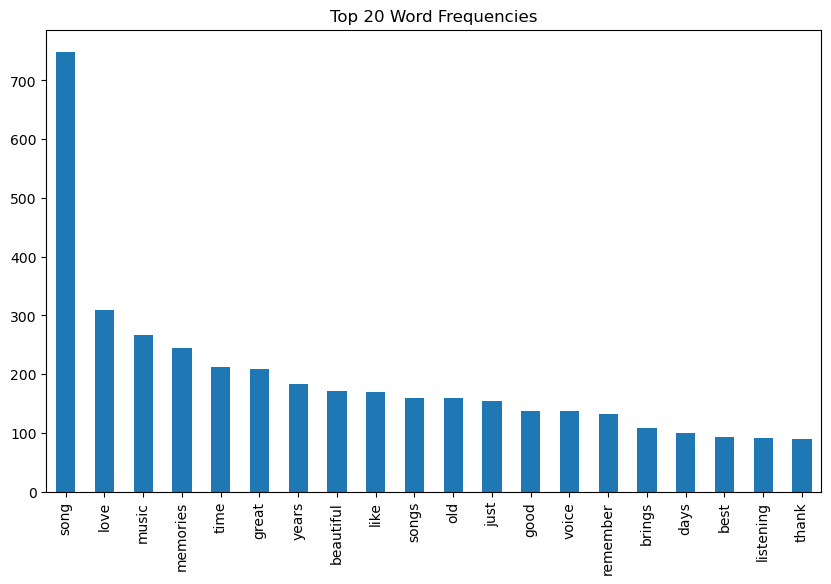

In [151]:

# generate word cloud
count_vect = CountVectorizer(max_features=20, stop_words='english')
X_count = count_vect.fit_transform(df['comment'])

# Convert the word frequency matrix to a DataFrame
count_df = pd.DataFrame(X_count.toarray(), columns=count_vect.get_feature_names_out())

# twenty most frequent words
count_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Top 20 Word Frequencies')
plt.show()


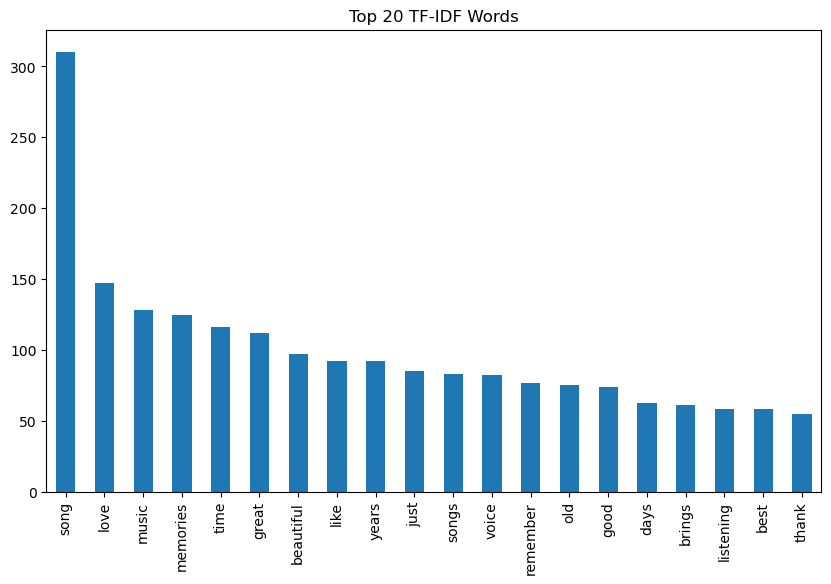

In [152]:

# generate TF-IDF word cloud
tfidf_vect = TfidfVectorizer(max_features=20, stop_words='english')
X_tfidf = tfidf_vect.fit_transform(df['comment'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())

# twenty most frequent words
tfidf_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), title='Top 20 TF-IDF Words')
plt.show()


In [156]:
from collections import Counter
import numpy as np
import plotly.graph_objects as go
from plotly.colors import sample_colorscale

# Ensure `sorted_indices` is within the bounds of `X_tfidf`
sorted_indices = np.argsort(X_tfidf.toarray().sum(axis=0))[::-1]  # Sort by importance, descending
sorted_indices = sorted_indices[:min(20, X_tfidf.shape[1])]  # Take top 20 or limit to available columns

# Prepare data for plotting
words = [tfidf_vect.get_feature_names_out()[i] for i in sorted_indices]  # Get top 20 words
frequencies = X_tfidf.toarray().sum(axis=0)[sorted_indices]  # Corresponding frequencies

# Scale font sizes based on frequencies
sizes = [freq * 2 for freq in frequencies]

# Generate grid positions and add random jitter to avoid overlap
grid_size = int(np.ceil(np.sqrt(len(words))))
x_positions, y_positions = np.meshgrid(range(grid_size), range(grid_size))
x_positions = x_positions.flatten()[:len(words)] + np.random.uniform(-1, 1, len(words))
y_positions = y_positions.flatten()[:len(words)] + np.random.uniform(-1, 1, len(words))

# Generate colors for each word
colors = sample_colorscale("Oranges", [i / len(words) for i in range(len(words))])[::-1]

# Create scatter plot with text
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_positions,
    y=y_positions,
    mode='text',
    text=words,
    textfont={'size': sizes, 'color': colors},
    textposition="middle center"
))

# Customize layout for aesthetics
fig.update_layout(
    title="Word Cloud",
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
    plot_bgcolor='black',
    width=1000,
    height=1000
)

fig.show()


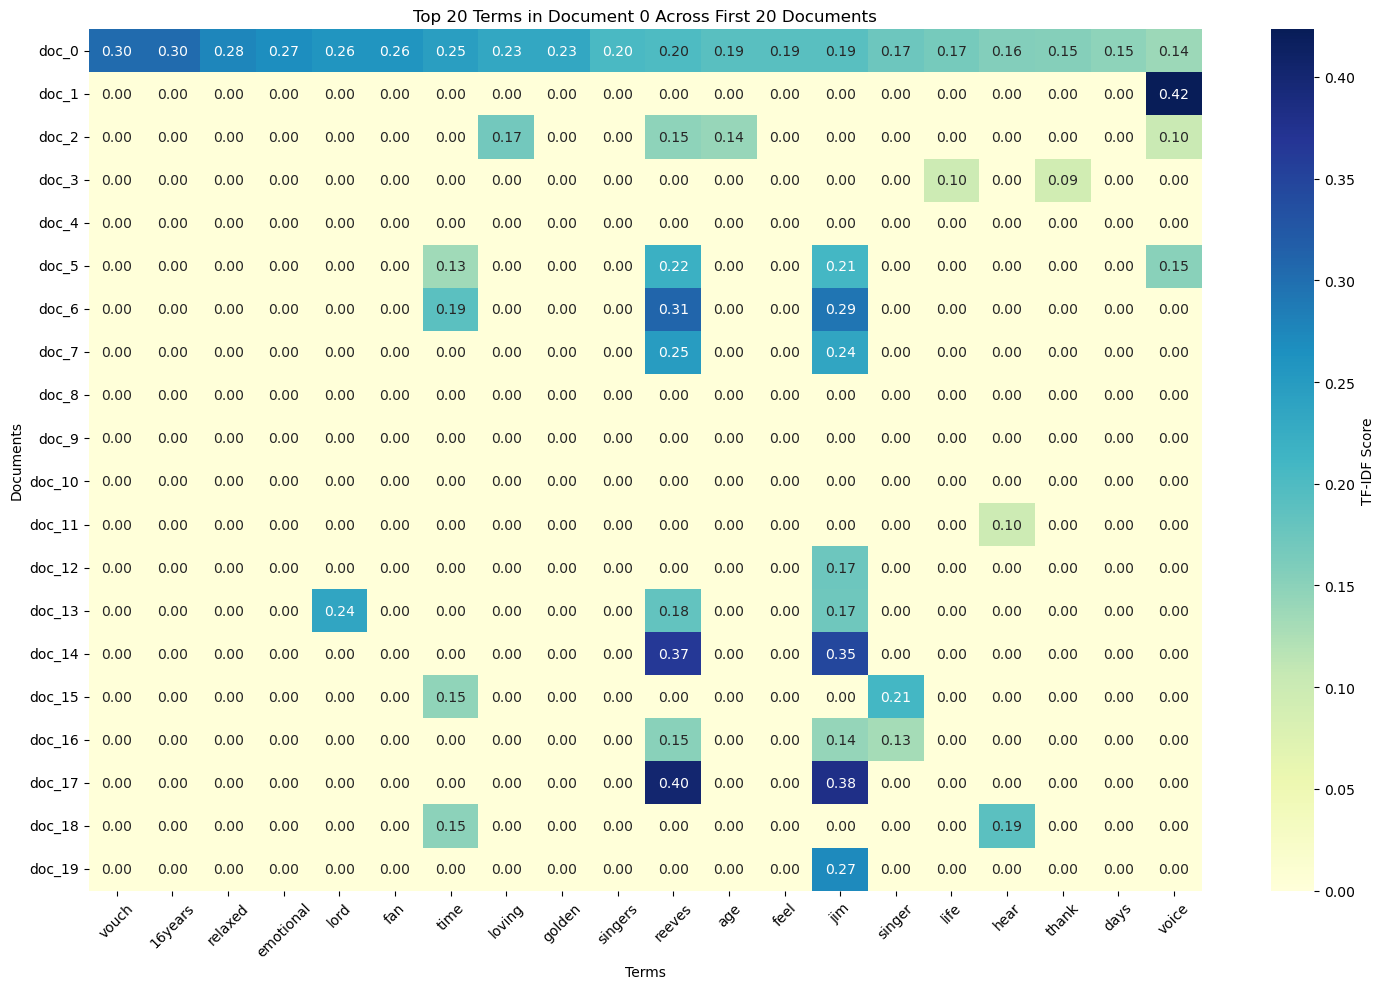

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# assume df is the DataFrame containing the comments
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
Z = vectorizer.fit_transform(df['comment'])

# Get the terms from the vectorizer
terms = vectorizer.get_feature_names_out()

# set the number of top terms to display
top_n = 20

# Get the top N terms in document 0
index_terms = np.argsort(Z.toarray()[0, :])[::-1][:top_n]  # obtain the indices of the top terms
top_terms = terms[index_terms]  # get the actual terms

# Define the labels for the heatmap
plot_y = [f"doc_{i}" for i in range(20)]  # Use the first 20 documents for comparison
plot_z = Z[:20, index_terms].toarray()  # Extract the top N terms for the first 20 documents

# Create a DataFrame for the heatmap
df_todraw = pd.DataFrame(plot_z, columns=top_terms, index=plot_y)

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_todraw, cmap="YlGnBu", annot=True, fmt='.2f', cbar_kws={'label': 'TF-IDF Score'})
plt.title("Top 20 Terms in Document 0 Across First 20 Documents")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.tight_layout()        # Adjust layout to make room for labels
plt.show()


/Users/gp/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



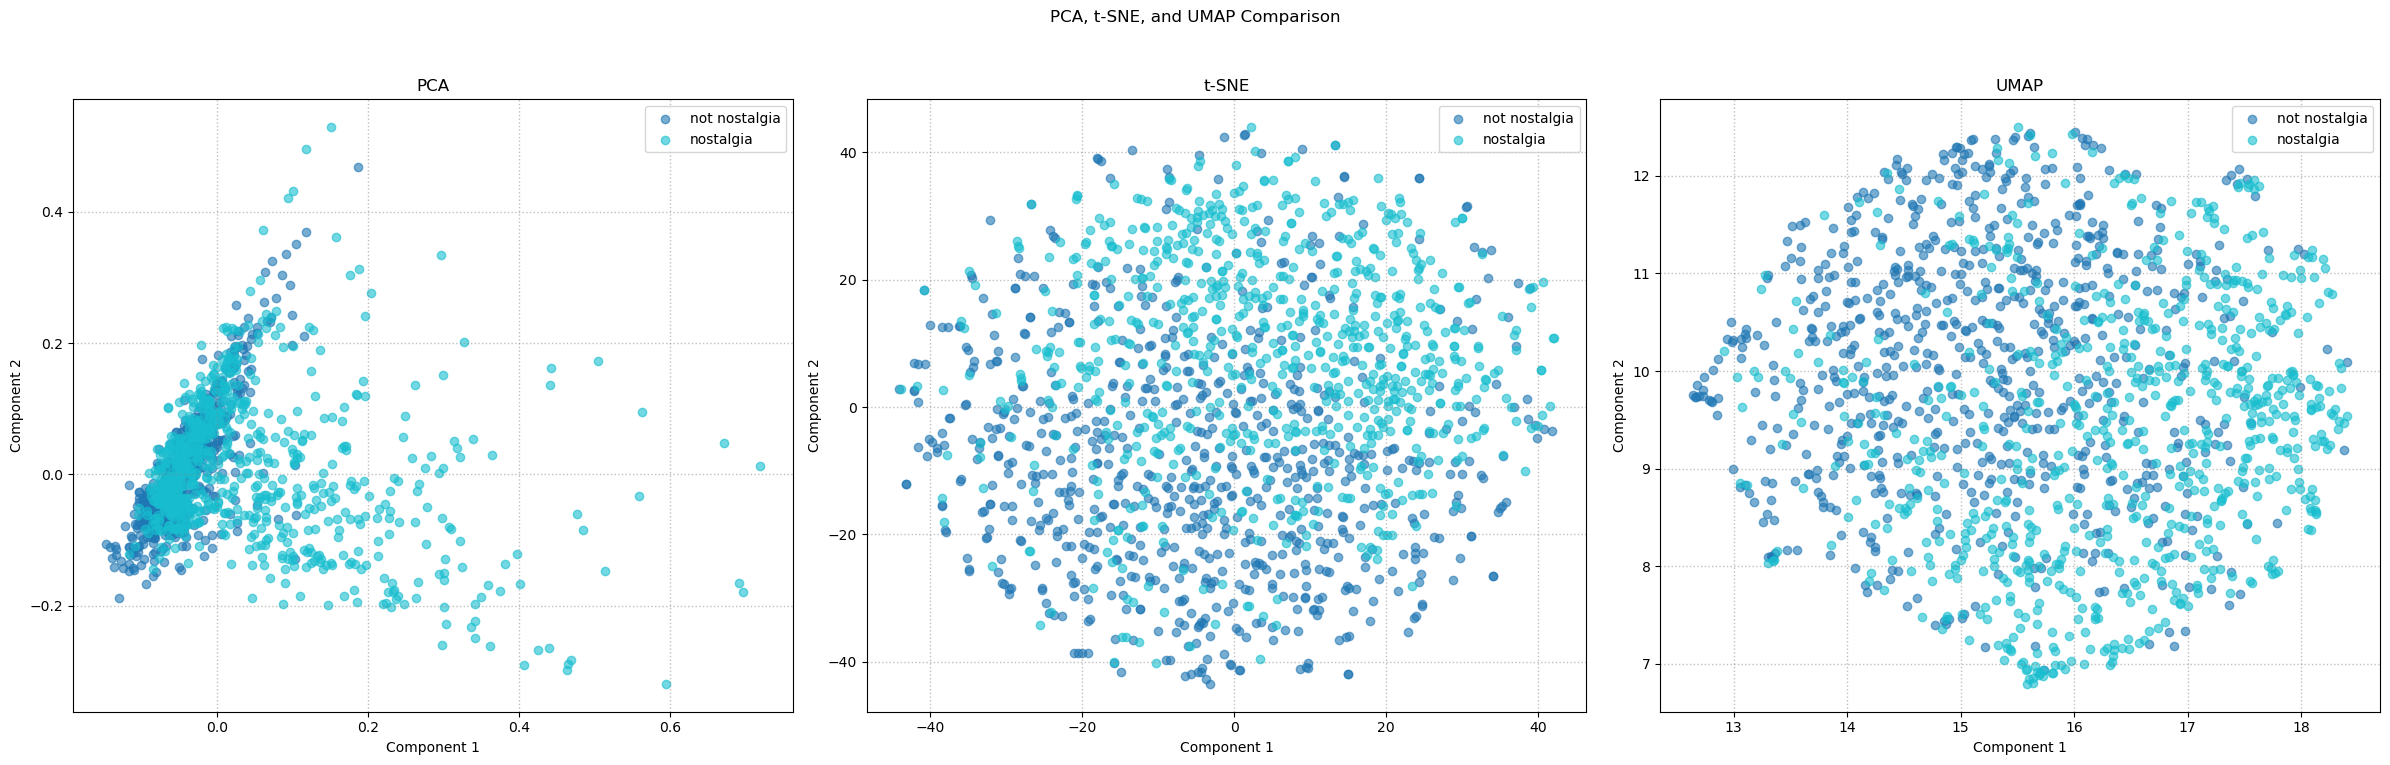

In [159]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# assume df is the DataFrame containing the comments
# Create a TF-IDF vectorizer
Z_pca = PCA(n_components=2).fit_transform(Z.toarray())
Z_tsne = TSNE(n_components=2, random_state=42).fit_transform(Z.toarray())
Z_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(Z.toarray())

categories = df['sentiment'].unique()  
colors = plt.cm.get_cmap('tab10', len(categories))
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# define a function to create a scatter plot for each method
def plot_scatter(ax, Z_reduced, title):
    for idx, category in enumerate(categories):
        xs = Z_reduced[df['sentiment'] == category][:, 0]  
        ys = Z_reduced[df['sentiment'] == category][:, 1]  
        ax.scatter(xs, ys, color=colors(idx), marker='o', label=category, alpha=0.6)

    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.5)
    ax.set_title(title)
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.legend(loc='upper right')

# create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], Z_pca, 'PCA')
plot_scatter(axes[1], Z_tsne, 't-SNE')
plot_scatter(axes[2], Z_umap, 'UMAP')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # adjust layout to make room for title
plt.show()


In [160]:
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# Apply PCA, t-SNE, and UMAP to the data with 3 components
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Define a function to create 3D scatter plots with Plotly
def plot_3d_scatter_interactive(X_reduced, title):
    fig = go.Figure()

    # Add scatter points for each category
    for c, category in zip(col, categories):
        mask = X['sentiment'] == category
        fig.add_trace(go.Scatter3d(
            x=X_reduced[mask][:, 0],
            y=X_reduced[mask][:, 1],
            z=X_reduced[mask][:, 2],
            mode='markers',
            marker=dict(size=1.5, opacity=0.8, symbol='circle', color=c),
            name=category
        ))

    # Update layout for 3D plot
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        ),
        width=800,
        height=600,
        showlegend=True
    )

    fig.show()

# Plot PCA, t-SNE, and UMAP with interactive 3D scatter plots
plot_3d_scatter_interactive(X_pca_3d, 'PCA 3D')
plot_3d_scatter_interactive(X_tsne_3d, 't-SNE 3D')
plot_3d_scatter_interactive(X_umap_3d, 'UMAP 3D')

In [161]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Assume the dataset has X (text) and y (labels)
X_train, X_test, y_train, y_test = train_test_split(X.comment, X.category, test_size=0.2, random_state=42)

# 1. Naive Bayes using Word Frequency Features
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_count = count_vectorizer.transform(X_test)  # Transform the test data

# Using MultinomialNB
count_nb = MultinomialNB()
count_nb.fit(X_train_count, y_train)  # Fit the model
y_pred_count = count_nb.predict(X_test_count)  # Make predictions

# Accuracy and evaluation report
print("Word Frequency Features - Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))

# 2. Naive Bayes using TF-IDF Features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform the test data

# Using BernoulliNB
tfidf_nb = BernoulliNB()
tfidf_nb.fit(X_train_tfidf, y_train)  # Fit the model
y_pred_tfidf = tfidf_nb.predict(X_test_tfidf)  # Make predictions

# Accuracy and evaluation report
print("TF-IDF Features - Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


Word Frequency Features - Naive Bayes:
Accuracy: 0.8366666666666667
              precision    recall  f1-score   support

           0       0.94      0.72      0.81       148
           1       0.78      0.95      0.86       152

    accuracy                           0.84       300
   macro avg       0.86      0.84      0.83       300
weighted avg       0.86      0.84      0.83       300

TF-IDF Features - Naive Bayes:
Accuracy: 0.8766666666666667
              precision    recall  f1-score   support

           0       0.94      0.80      0.86       148
           1       0.83      0.95      0.89       152

    accuracy                           0.88       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.89      0.88      0.88       300



### Observations from the Results

1. **Accuracy Comparison**:
   - The **Word Frequency Features** model achieved an accuracy of **83.67%**, while the **TF-IDF Features** model improved this to **87.67%**. This indicates that using TF-IDF representation provides better overall performance in this classification task.

2. **Precision and Recall**:
   - For **Word Frequency**:
     - Class **0**: High precision (0.94) but lower recall (0.72), suggesting the model is good at identifying true positives but misses some actual instances of class 0.
     - Class **1**: Lower precision (0.78) but high recall (0.95), indicating it captures most true instances but also includes some false positives.
   - For **TF-IDF**:
     - Class **0**: Similar high precision (0.94) with improved recall (0.80), indicating better identification of class 0.
     - Class **1**: Slightly improved precision (0.83) with consistent recall (0.95), showing better balance and reliability in predictions.

<hr>

## Section 4

<hr>

### Inefficiencies Noticed

1. **Data Cleaning**: 
   - Redundant checks for duplicates and inconsistent text processing (e.g., missing lowercasing or lemmatization).

2. **Feature Engineering**:
   - Basic feature selection methods (e.g., CountVectorizer) without tuning for n-grams or contextual information.

3. **Vectorization**:
   - Use of default parameters in vectorizers, potentially ignoring stop words or including irrelevant terms.

4. **Data Splitting**:
   - Lack of stratification in train-test splits, risking class imbalance.

5. **Limited Exploratory Data Analysis (EDA)**:
   - Insufficient EDA, leading to missed trends or anomalies in the dataset.

### Improvements

1. **Enhanced Data Cleaning**:
   - Implement systematic handling of missing values and uniform text transformations.

2. **Advanced Feature Engineering**:
   - Experiment with n-grams, TF-IDF, and embeddings for richer text representation.

3. **Optimizing Vectorization**:
   - Fine-tune vectorizer parameters, including stop words and document frequency settings.

4. **Improved Data Splitting**:
   - Use stratified sampling to maintain class proportions in train-test splits.

5. **Incorporate EDA**:
   - Conduct thorough EDA to guide preprocessing and feature selection.

6. **Document Preprocessing Steps**:
   - Keep detailed notes on preprocessing steps for reproducibility and future adjustments. 

By addressing these points, we can enhance the preprocessing pipeline's efficiency and the overall model performance.